In [1]:
# matplotlib設定用コート
# matplotlibに描画する度に（, fontproperties=font）引数を指定する。
# なぜか設定ファイルはきかない。。。
import os
from matplotlib import pyplot as plt, font_manager

font_manager._rebuild()
font_dir = font_manager.win32FontDirectory()
font_path = os.path.join(font_dir, 'SourceHanCodeJP-Regular.otf')
font = font_manager.FontProperties(fname=font_path, size=14)

### 文字の数え方
- 英語
- 日本語
 - 日本語の読み出しは、青空文庫のテキストを活用する。
- 1文の文字量を計算する。
 - 文章を文に区切る。英語であればnltk.tokenize.sent_tokenize(text)が便利。
 - 日本語は英語ほど簡単に文を切り出せないため、個別のロジックが必要。

In [32]:
# 文字の出現頻度の出し方：Coutner()
# Counterクラスを使うと、キーに文字、値に出現頻度をまとめる辞書型が得られる。
from collections import Counter
string = "This is a pen."
cnt = Counter(string)
print(cnt)
print( '"i"のtf:', cnt['i'] )

Counter({' ': 3, 'i': 2, 's': 2, 'T': 1, 'h': 1, 'a': 1, 'p': 1, 'e': 1, 'n': 1, '.': 1})
"i"のtf: 2


In [6]:
# 青空文庫のデータ読み出しスクリプト
# ルビなどのタグ情報を削除するAozora.pyファイルを使う。
from aozora import Aozora
aozora = Aozora('D:/1.programming/python/PythonTextMining/Data/773_ruby_5968/kokoro.txt')
c = 0
for u in aozora.read():
    print(u)
    c += 1
    if c == 12: #全編は長いので途中で止める。
        break

こころ
夏目漱石


上　先生と私


一

　私はその人を常に先生と呼んでいた。だからここでもただ先生と書くだけで本名は打ち明けない。これは世間を憚かる遠慮というよりも、その方が私にとって自然だからである。私はその人の記憶を呼び起すごとに、すぐ「先生」といいたくなる。筆を執っても心持は同じ事である。よそよそしい頭文字などはとても使う気にならない。
　私が先生と知り合いになったのは鎌倉である。その時私はまだ若々しい書生であった。暑中休暇を利用して海水浴に行った友達からぜひ来いという端書を受け取ったので、私は多少の金を工面して、出掛ける事にした。私は金の工面に二、三日を費やした。ところが私が鎌倉に着いて三日と経たないうちに、私を呼び寄せた友達は、急に国元から帰れという電報を受け取った。電報には母が病気だからと断ってあったけれども友達はそれを信じなかった。友達はかねてから国元にいる親たちに勧まない結婚を強いられていた。彼は現代の習慣からいうと結婚するにはあまり年が若過ぎた。それに肝心の当人が気に入らなかった。それで夏休みに当然帰るべきところを、わざと避けて東京の近くで遊んでいたのである。彼は電報を私に見せてどうしようと相談をした。私にはどうしていいか分らなかった。けれども実際彼の母が病気であるとすれば彼は固より帰るべきはずであった。それで彼はとうとう帰る事になった。せっかく来た私は一人取り残された。
　学校の授業が始まるにはまだ大分日数があるので鎌倉におってもよし、帰ってもよいという境遇にいた私は、当分元の宿に留まる覚悟をした。友達は中国のある資産家の息子で金に不自由のない男であったけれども、学校が学校なのと年が年なので、生活の程度は私とそう変りもしなかった。したがって一人ぼっちになった私は別に恰好な宿を探す面倒ももたなかったのである。


In [33]:
# -*- coding: utf-8 -*-
# 4.1.1節 文字の出現頻度  青空文庫のテキストを取り込んで、文字の出現回数を数える
from collections import Counter
from aozora import Aozora
aozora = Aozora("wagahaiwa_nekodearu.txt")
 
# 文字ごとの出現頻度を調べる
string = '\n'.join(aozora.read())  # パラグラフをすべて結合して1つの文字列にする
cnt = Counter(string)
# 頻度順にソートして出力する
print(sorted(cnt.items(), key=lambda x: x[1], reverse=True)[:50])

[('の', 12476), ('い', 10299), ('る', 8725), ('て', 8601), ('な', 8571), ('と', 8113), ('に', 7616), ('。', 7486), ('か', 7303), ('し', 6947), ('は', 6879), ('、', 6773), ('で', 6227), ('た', 6131), ('を', 6119), ('が', 6000), ('っ', 5629), ('ら', 5552), ('う', 5326), ('も', 5220), ('ん', 4015), ('だ', 3905), ('あ', 3902), ('す', 3680), ('く', 3328), ('れ', 3279), ('ま', 3273), ('「', 3238), ('」', 3238), ('り', 3060), ('こ', 2684), ('そ', 2464), ('\n', 2340), ('人', 2287), ('よ', 2152), ('え', 1829), ('さ', 1733), ('事', 1491), ('云', 1423), ('ど', 1404), ('け', 1392), ('君', 1315), ('ろ', 1308), ('や', 1300), ('き', 1294), ('出', 1233), ('見', 1216), ('つ', 1174), ('ち', 1121), ('へ', 1097)]


In [35]:
# -*- coding: utf-8 -*-
# 4.1.2 テキストを文ごとに分割する
# nltk.sent_tokenize(text)の区切り方を確認する。なかなか賢い。
import nltk
from nltk.corpus import inaugural
text = inaugural.raw('1789-Washington.txt')[:775]
sents = nltk.tokenize.sent_tokenize(text)
for u in sents: #><で囲まれている範囲が切り出した文である。
    print('>'+u+'<')

>Fellow-Citizens of the Senate and of the House of Representatives:

Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month.<
>On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time.<
>On the other hand,<


(長さ, 頻度)の形で出力している。一例をあげると、843文字の文が1つあった、ということ。
[(843, 1), (695, 1), (692, 1), (654, 1), (572, 1), (570, 1), (515, 1), (487, 1), (477, 1), (436, 1), (369, 1), (315, 1), (279, 1), (278, 1), (230, 1), (209, 1), (183, 1), (179, 1), (169, 1), (138, 1), (119, 1), (118, 1), (63, 1)]


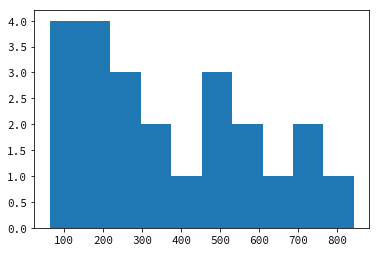

In [40]:
# -*- coding: utf-8 -*-
# 4.1.2節　テキストを文ごとに分割し文字数を数える　文への分割
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import inaugural
from collections import Counter
text = inaugural.raw('1789-Washington.txt')
sents = nltk.tokenize.sent_tokenize(text)   # sentsは1文ずつを要素とするリスト
# sentsの文ごとの文字数のリストを作り、Counterで頻度を数える
cnt = Counter(len(x) for x in sents)
# 頻度と長さの降順にソートして表示
print('(長さ, 頻度)の形で出力している。一例をあげると、843文字の文が1つあった、ということ。')
print(sorted(cnt.items(), key=lambda x: [x[1], x[0]], reverse=True))

nstring = np.array([len(x) for x in sents])
plt.hist(nstring)
plt.show()

頻度の多い順に文の長さを並び替えた場合：
[(14, 248), (12, 229), (17, 228), (16, 226), (13, 220), (19, 219), (15, 219), (20, 216), (22, 213), (18, 213), (10, 207), (11, 207), (21, 203), (9, 201), (23, 199), (25, 199), (27, 193), (24, 175), (26, 175), (8, 172), (28, 167), (31, 165), (29, 162), (30, 141), (33, 131), (32, 131), (34, 131), (7, 128), (35, 126), (36, 126), (37, 125), (38, 124), (42, 122), (45, 111), (39, 108), (40, 105), (43, 103), (6, 101), (41, 100), (5, 98), (44, 94), (47, 92), (49, 85), (46, 80), (48, 77), (56, 74), (50, 72), (52, 72), (51, 71), (60, 71), (55, 68), (54, 62), (57, 60), (53, 58), (4, 57), (58, 52), (63, 50), (62, 49), (65, 46), (66, 45), (59, 44), (67, 44), (68, 40), (61, 38), (70, 37), (3, 37), (64, 35), (69, 34), (72, 30), (74, 27), (77, 27), (73, 26), (76, 25), (71, 24), (82, 22), (83, 22), (78, 22), (75, 21), (79, 19), (88, 19), (81, 18), (80, 18), (84, 17), (94, 14), (85, 14), (89, 13), (101, 13), (92, 13), (95, 13), (93, 13), (98, 13), (87, 12), (91, 12), (90, 12), (96, 

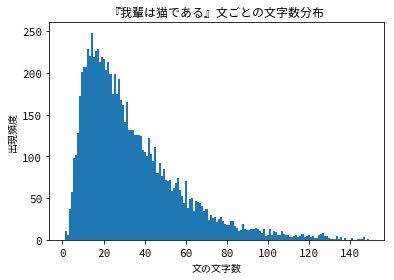

文の長さ順に並べた場合：
[(411, 1), (403, 1), (334, 1), (323, 1), (306, 1), (298, 1), (269, 1), (247, 1), (245, 1), (233, 1), (231, 1), (229, 1), (220, 1), (216, 1), (215, 1), (208, 1), (206, 1), (205, 1), (198, 1), (194, 1), (191, 1), (187, 1), (183, 1), (181, 1), (180, 2), (177, 1), (174, 1), (169, 2), (168, 2), (165, 1), (164, 1), (163, 3), (161, 1), (159, 1), (156, 2), (154, 2), (153, 2), (151, 1), (150, 1), (149, 1), (147, 3), (146, 1), (145, 1), (144, 1), (141, 2), (138, 2), (136, 3), (135, 1), (134, 4), (133, 1), (132, 1), (131, 1), (130, 2), (129, 4), (128, 5), (127, 8), (126, 7), (125, 6), (124, 2), (123, 2), (122, 4), (121, 3), (120, 6), (119, 4), (118, 3), (117, 7), (116, 5), (115, 3), (114, 6), (113, 4), (112, 3), (111, 3), (110, 6), (109, 6), (108, 7), (107, 11), (106, 6), (105, 6), (104, 9), (103, 11), (102, 6), (101, 13), (100, 6), (99, 5), (98, 13), (97, 8), (96, 11), (95, 13), (94, 14), (93, 13), (92, 13), (91, 12), (90, 12), (89, 13), (88, 19), (87, 12), (86, 10), (85, 14), (84, 

In [46]:
# -*- coding: utf-8 -*-
# 4.1.2節 テキストを文ごとに分割し文字数を数える  文ごとの文字数分布の例
from collections import Counter
import re
import numpy as np
import matplotlib.pyplot as plt
from aozora import Aozora
 
aozora = Aozora("wagahaiwa_nekodearu.txt")
 
# 文に分解してから、文ごとに文字数をカウントする
string = '\n'.join(aozora.read())
# 全角空白を取り除く。句点・改行で分割、。」の。は改行しない
string = re.split('。(?!」)|\n', re.sub('　', '', string))
while '' in string:  string.remove('')   # 空行を除く

cnt = Counter([len(x) for x in string])  # stringの要素（文）の長さをリストにする
# 文の長さを頻度順にソートして出力する
print('頻度の多い順に文の長さを並び替えた場合：')
print(sorted(cnt.items(), key=lambda x: x[1], reverse=True)[:100])

nstring = np.array([len(x) for x in string if len(x) < 150])
#print('max', nstring.max()) #ちょい紛らわしいのでコメントアウト
plt.hist(nstring, bins=nstring.max())
plt.title('『我輩は猫である』文ごとの文字数分布')
plt.xlabel('文の文字数')
plt.ylabel('出現頻度')
plt.show()

# 文の長さ順にソートして出力する
print('文の長さ順に並べた場合：')
print(sorted(cnt.items(), reverse=True)[:100]) 

average 25.55
variance 130.8475
std-deviation 11.438859208854701
6
7
7
13
16
19
20
22
23
28
28
30
30
32
33
35
35
38
43
46


D:\0.programs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


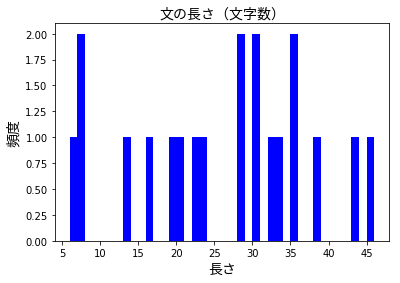

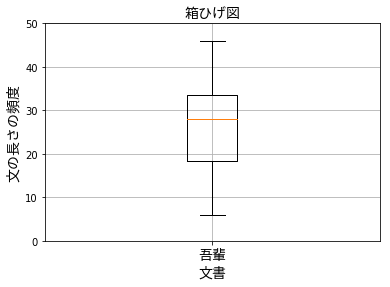

In [38]:
# -*- coding: utf-8 -*-
# リスト 3-3 『吾輩は猫である』を文に分解し、文の文字数のヒストグラム・箱ひげ図を描くプログラム
from aozora import Aozora
import re
import MeCab
import numpy as np
import matplotlib.pyplot as plt
aozora = Aozora("wagahaiwa_nekodearu.txt") #Aozoraクラスのインスタンスを作る。
 
# 文に分解する
string = '\n'.join(aozora.read()) #正規表現で置換するために文字列に直す。
# string = re.sub('　', '', string) #' 'を除外する。ただ、個人的には下1行のみで十分だと思う。
string = re.split('。(?!」)|\n', re.sub('　', '', string)) #改行キーを参考にリスト化する。
while '' in string:  string.remove('')  # 空行を除く
#m = MeCab.Tagger("-Ochasen")            # MeCabで品詞分解する
 
# 先頭20文について文単位で形態素解析し、名詞だけ抽出して、基本形を文ごとのリストにする
lengthlist = np.array( [len(v) for v in string][3:23] ) #先頭20文の文字量を計算する。
print('average', lengthlist.mean())
print('variance', lengthlist.var())
print('std-deviation', lengthlist.std())
#for u in lengthlist: print(u)           # それぞれの文の長さを、出現順に表示。見づらいのでコメントアウトする。
for u in sorted(lengthlist): print(u)   # それぞれの文の長さを、長さ順に表示

#plt.rcParams['font.family'] = 'IPAGothic'
fig = plt.figure()
plt.title('文の長さ（文字数）', fontproperties=font)
plt.xlabel('長さ', fontproperties=font)
plt.ylabel('頻度', fontproperties=font)
plt.hist(lengthlist, color='blue', bins=40)  # binsでヒストグラムの横軸区分数を指定 
plt.show()

# 箱ひげ図を作る
plt.boxplot(lengthlist)
plt.xticks([1], ['吾輩'], fontproperties=font)
plt.title('箱ひげ図', fontproperties=font)
plt.grid()
plt.xlabel('文書', fontproperties=font)
plt.ylabel('文の長さの頻度', fontproperties=font)
plt.ylim([0,50])
plt.show()

### 単語毎の出現頻度（tf）
- 英語の場合、空白区切りで単語を区切り、出現頻度を数える。
- 日本語の場合、形態素解析器（以下、MeCab）を用いて出現頻度を数える。
 - 文章全体の含まれる形態素のtfを計測する。
 - 文章を1文に区切り、1文に含まれる形態素数を計測する。

1文に含まれる形態素数（頻度順）：ワシントン大統領の演説
[(140, 1), (112, 1), (110, 1), (104, 1), (93, 1), (91, 1), (89, 1), (88, 1), (81, 1), (69, 1), (63, 1), (51, 1), (47, 1), (46, 1), (41, 1), (38, 1), (34, 1), (30, 1), (29, 1), (25, 1), (20, 1), (19, 1), (11, 1)]
1文に含まれる形態素数（頻度順）：ケネディ大統領の演説
[(7, 5), (25, 4), (21, 3), (19, 3), (14, 3), (11, 3), (67, 2), (44, 2), (40, 2), (36, 2), (20, 2), (18, 2), (13, 2), (82, 1), (55, 1), (54, 1), (48, 1), (47, 1), (45, 1), (38, 1), (33, 1), (30, 1), (28, 1), (27, 1), (26, 1), (23, 1), (22, 1), (16, 1), (6, 1), (4, 1)]
1文に含まれる形態素数（頻度順）：オバマ大統領の演説
[(4, 7), (19, 6), (30, 5), (28, 4), (23, 4), (21, 4), (18, 4), (11, 4), (10, 4), (9, 4), (8, 4), (40, 3), (26, 3), (24, 3), (17, 3), (16, 3), (13, 3), (12, 3), (7, 3), (5, 3), (57, 2), (51, 2), (36, 2), (33, 2), (31, 2), (25, 2), (20, 2), (14, 2), (1, 2), (85, 1), (69, 1), (66, 1), (62, 1), (56, 1), (54, 1), (46, 1), (37, 1), (35, 1), (32, 1), (27, 1), (15, 1), (6, 1), (3, 1), (2, 1)]


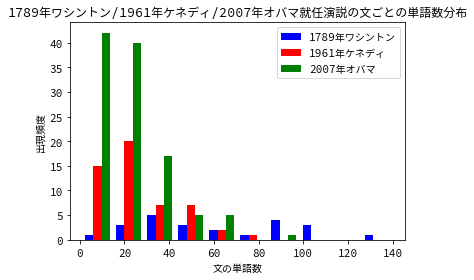

In [57]:
# -*- coding: utf-8 -*-
# リスト 4-1(2) 文に分割し、さらに単語に分割して数える例
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import inaugural
from collections import Counter
sents_Washington = nltk.tokenize.sent_tokenize(inaugural.raw('1789-Washington.txt'))
sents_Kennedy= nltk.tokenize.sent_tokenize(inaugural.raw('1961-Kennedy.txt'))
sents_Obama = nltk.tokenize.sent_tokenize(inaugural.raw('2009-Obama.txt'))

cnt_Washington = Counter(len(sent.split()) for sent in sents_Washington)
cnt_Kennedy = Counter(len(sent.split()) for sent in sents_Kennedy)
cnt_Obama = Counter(len(sent.split()) for sent in sents_Obama)
print('1文に含まれる形態素数（頻度順）：ワシントン大統領の演説')
print(sorted(cnt_Washington.items(), key=lambda x: [x[1], x[0]], reverse=True))
print('1文に含まれる形態素数（頻度順）：ケネディ大統領の演説')
print(sorted(cnt_Kennedy.items(), key=lambda x: [x[1], x[0]], reverse=True))
print('1文に含まれる形態素数（頻度順）：オバマ大統領の演説')
print(sorted(cnt_Obama.items(), key=lambda x: [x[1], x[0]], reverse=True))

nstring_Washington = np.array( [len(sent.split()) for sent in sents_Washington] )
nstring_Kennedy = np.array( [len(sent.split()) for sent in sents_Kennedy] )
nstring_Obama = np.array( [len(sent.split()) for sent in sents_Obama] )

plt.hist([nstring_Washington, nstring_Kennedy, nstring_Obama],
          color=['blue', 'red', 'green'],
          label=['1789年ワシントン', '1961年ケネディ', '2007年オバマ'])
plt.title('1789年ワシントン/1961年ケネディ/2007年オバマ就任演説の文ごとの単語数分布')

plt.xlabel('文の単語数')
plt.ylabel('出現頻度')
plt.legend()
plt.show()

### MeCab（IPA辞書）をWindowsに入れるためにやったことリスト
1. MeCabのインストール
 - 参考ＵＲＬ：[http://memopy.blogspot.jp/2017/11/pythonwindowsmecab.html]
 - 64bit版(mecab-0.996-64.exe)のインストール：[https://github.com/ikegami-yukino/mecab/releases]
 - UTF-8を選択。（そうしないと、ファイルの入出力による操作がきかなくなると思われる。）
 - 生成される「\sdk」直下を「C:\Program Files (x86)\MeCab\sdk」へコピー。（これを設定して動いたので、多分かなり重要。）
1. Pathを通す
 - 「コントロールパネル」の「システムの詳細設定」から「環境変数」を設定できる。
 - 「Path」に「C:\MeCab\bin」 を追加。
 - 後からpython連携させるときに必要なので「MECABRC」に「C:\MeCab\etc\mecabrc」も追加。
1. Visual Studioのインストール
 - Visual Studio 2017 Communityを入れた。[https://www.visualstudio.com/ja/thank-you-downloading-visual-studio/?sku=Community&rel=15]
 - C++を使える環境があれば、やらなくてもよい？
1. pip install mecab-python-windows
 - 参考ＵＲＬ：[https://qiita.com/yukinoi/items/990b6933d9f21ba0fb43]

上記の内、重要なのは①、④。場合によっては②③は省略できるのかも。
- 本家ＵＲＬ：[http://taku910.github.io/mecab/]


### MeCabの使い方
1. 分かち書きモード：入力文を分かち書きする。    
分かち書きした文章は、英語と同じように処理ができるだろう。
 - 書き方：mecab -Owakati -o <outputfile> <inputfile>
1. 語の情報を列挙する：分かち書きした上で、「元の語、読み、原形、品詞情報、追加の情報」の形に纏める。
 - 書き方①：-Ochasen（形態素解析プログラムChaSenと互換の出力）
 - 書き方②：-Odump（全情報を出力）

In [21]:
# MeCabによる形態素解析
from aozora import Aozora
import re
import MeCab
import numpy as np
import matplotlib.pyplot as plt

m = MeCab.Tagger("-Ochasen") # MeCabのインスタンスを作りmとする
out = m.parse("すもももももももものうち") # 入力stringをm.parseで分解する
print(out)

xlist = [u.split() for u in out.splitlines()]
xlist

すもも	スモモ	すもも	名詞-一般		
も	モ	も	助詞-係助詞		
もも	モモ	もも	名詞-一般		
も	モ	も	助詞-係助詞		
もも	モモ	もも	名詞-一般		
の	ノ	の	助詞-連体化		
うち	ウチ	うち	名詞-非自立-副詞可能		
EOS



[['すもも', 'スモモ', 'すもも', '名詞-一般'],
 ['も', 'モ', 'も', '助詞-係助詞'],
 ['もも', 'モモ', 'もも', '名詞-一般'],
 ['も', 'モ', 'も', '助詞-係助詞'],
 ['もも', 'モモ', 'もも', '名詞-一般'],
 ['の', 'ノ', 'の', '助詞-連体化'],
 ['うち', 'ウチ', 'うち', '名詞-非自立-副詞可能'],
 ['EOS']]

In [22]:
#形態素解析結果のファイル出力方法
with open('MorphemeList.txt', 'w') as file:
    file.write(out)

In [69]:
# 品詞情報のまとめ方
# 場合によっては、細かい品詞情報はいらないだろう。例えば、「名詞-一般」は「名詞」だけでよい。
# あと、EOSがリストに含まれるとfor文でエラーになる。EOSを除外する処理も必要。
testlist = []
for u in xlist:
    testlist.append(u[3])
testcnt = Counter(testlist)
testcnt

Counter({'名詞-一般': 3, '助詞-係助詞': 2, '助詞-連体化': 1, '名詞-非自立-副詞可能': 1})

In [58]:
# -*- coding: utf-8 -*-
# リスト 4-2 文書全体を単語に分解し、出現頻度を数えるプログラム例
from collections import Counter
from aozora import Aozora
import MeCab
 
aozora = Aozora("wagahaiwa_nekodearu.txt")
string = '\n'.join(aozora.read())     # 1つの文字列データにする
 
# 形態素解析して、語の出現頻度を数える
m = MeCab.Tagger("-Ochasen")          # MeCabで単語に分割する
mecablist = []
wlist = m.parse(string).splitlines()  # 結果を単語情報リストのリストに整形する
for u in wlist:
    xlist = []
    for v in u.split():
        xlist.append(v)
    mecablist.append(xlist)

# 得られた単語情報リストのリストから、単語の部分だけを取り出したリストを作る
wordbodylist = []
for u in mecablist:
    wordbodylist.append(u[0])
# 単語のリストで出現頻度を数える
cnt = Counter(wordbodylist)
# 頻度順に100個表示
print(sorted(cnt.items(), key=lambda x: x[1], reverse=True)[:100])

[('の', 9193), ('。', 7486), ('て', 6873), ('、', 6773), ('は', 6424), ('に', 6267), ('を', 6071), ('と', 5515), ('が', 5339), ('た', 3987), ('で', 3805), ('「', 3238), ('」', 3238), ('も', 2474), ('ない', 2391), ('だ', 2367), ('し', 2326), ('から', 2041), ('ある', 1731), ('な', 1611), ('ん', 1568), ('か', 1530), ('いる', 1251), ('事', 1207), ('へ', 1034), ('する', 998), ('う', 992), ('もの', 981), ('君', 973), ('です', 973), ('云う', 937), ('主人', 932), ('よう', 696), ('ね', 682), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 554), ('そう', 554), ('何', 539), ('なる', 529), ('さ', 512), ('よ', 509), ('なら', 483), ('吾輩', 482), ('い', 476), ('ます', 458), ('じゃ', 448), ('…', 433), ('これ', 414), ('記号-空白', 409), ('なっ', 404), ('それ', 386), ('来', 364), ('れ', 356), ('見', 350), ('でも', 348), ('時', 344), ('迷亭', 343), ('――', 333), ('ませ', 330), ('いい', 320), ('ところ', 315), ('まで', 313), ('方', 312), ('三', 311), ('二', 302), ('ず', 299), ('上', 294), ('まし', 289), ('寒月', 286), ('顔', 282), ('ぬ', 277), ('先生', 274), ('見る', 273), ('人間', 272), 

1文の中に含まれる形態素数を頻度順に並び替える
[(12, 360), (10, 359), (8, 355), (9, 352), (11, 346), (14, 337), (13, 331), (7, 325), (15, 307), (16, 301), (19, 280), (6, 271), (18, 271), (17, 254), (20, 252), (21, 242), (22, 213), (5, 203), (23, 192), (26, 185), (24, 185), (27, 168), (29, 167), (25, 166), (28, 153), (4, 151), (30, 144), (31, 132), (33, 116), (32, 114), (35, 108), (34, 102), (37, 98), (39, 96), (38, 95), (36, 91), (41, 80), (40, 77), (44, 69), (42, 66), (43, 57), (45, 52), (46, 52), (48, 44), (47, 44), (53, 44), (52, 39), (3, 38), (50, 38), (54, 30), (51, 30), (56, 30), (49, 25), (55, 24), (60, 23), (62, 23), (57, 19), (61, 19), (66, 18), (58, 18), (59, 17), (64, 17), (65, 14), (67, 14), (2, 13), (70, 13), (79, 13), (68, 11), (63, 11), (72, 11), (69, 8), (77, 8), (80, 8), (76, 8), (86, 7), (73, 6), (78, 6), (75, 6), (71, 6), (82, 5), (81, 5), (74, 4), (87, 4), (83, 4), (85, 4), (88, 3), (105, 3), (95, 3), (108, 3), (100, 3), (103, 3), (93, 3), (89, 2), (160, 2), (197, 2), (91, 2), (104, 2), (

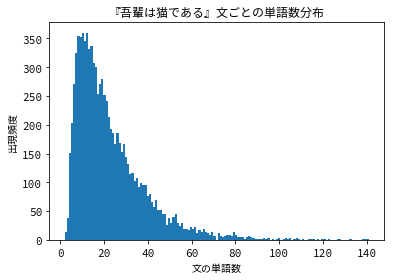

In [60]:
# -*- coding: utf-8 -*-
# リスト 4-3  文ごとに単語に分解し、出現頻度を数えるプログラム例
from collections import Counter
import re
import numpy as np
import matplotlib.pyplot as plt
from aozora import Aozora
import MeCab
 
aozora = Aozora("wagahaiwa_nekodearu.txt")
 
# 入力テキストを文に分解する。単純に'。'で分割する
string = '\n'.join(aozora.read())
string = re.sub('　', '', string)
string = re.split('。(?!」)|\n', re.sub('　', '', string))
while '' in string:  string.remove('')      # 空行を除く

# 文ごとに形態素解析して、文当たりの語の数を数える
m = MeCab.Tagger("-Ochasen")                # MeCabで単語に分割する
wordcountlist = []
for sentense in string:
    mecablist = []
    wlist = m.parse(sentense).splitlines()  # 結果を単語情報リストのリストに整形する
    for u in wlist:
        xlist = []
        for v in u.split():
            xlist.append(v)
        mecablist.append(xlist)
    # 得られた単語情報リストのリストから、単語の部分だけを取り出したリストを作る
    wordbodylist = []
    for u in mecablist:
        wordbodylist.append(u[0])
    # 単語数のリストを作る
    wordcountlist.append(len(wordbodylist))

cnt = Counter(wordcountlist)
# 結果をカウント数の降順にソート
print('1文の中に含まれる形態素数を頻度順に並び替える')
print(sorted(cnt.items(), key=lambda x: x[1], reverse=True)[:100])
u = np.array(wordcountlist)
nstring = u[ np.where(u < 150) ]
plt.hist(nstring, bins=nstring.max())
plt.title('『吾輩は猫である』文ごとの単語数分布')
plt.xlabel('文の単語数')
plt.ylabel('出現頻度')
plt.show()

### N-gram
- N-gramを切り出して出現頻度を数えるプログラム(文字列)
- N-gramを切り出して出現頻度を数えるプログラム(JEITA)
- 任意のN-gramの検索方法
- N-gramを用いた文章自動生成

In [29]:
# -*- coding: utf-8 -*-
# リスト 5-1  N-gram を切り出して出現回数を数えるプログラム例
from collections import Counter
import numpy as np
string = "吾輩は猫である。名前はまだ無い。"
delimiter = ['「', '」', '…', '　']
 
doublets = list(zip(string[:-1], string[1:])) #「最後の1文字除いた文字列」「最初の1文字除いた文字列」を組み合わせるとバイグラムになる。
# doubletsの各バイグラムのうち、delimiterを含むバイグラムを除去する。
doublets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter)) ),  \
                  doublets)
 
triplets = list(zip(string[:-2], string[1:-1], string[2:]))
triplets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter) or \
                                 (x[2] in delimiter))), triplets)
 
dic2 = Counter(doublets)
for k,v in sorted(dic2.items(), key=lambda x:x[1], reverse=True)[:50] :
    print(k, v)

dic3 = Counter(triplets)
for k,v in sorted(dic3.items(), key=lambda x:x[1], reverse=True)[:50] :
    print(k, v)

('吾', '輩') 1
('輩', 'は') 1
('は', '猫') 1
('猫', 'で') 1
('で', 'あ') 1
('あ', 'る') 1
('る', '。') 1
('。', '名') 1
('名', '前') 1
('前', 'は') 1
('は', 'ま') 1
('ま', 'だ') 1
('だ', '無') 1
('無', 'い') 1
('い', '。') 1
('吾', '輩', 'は') 1
('輩', 'は', '猫') 1
('は', '猫', 'で') 1
('猫', 'で', 'あ') 1
('で', 'あ', 'る') 1
('あ', 'る', '。') 1
('る', '。', '名') 1
('。', '名', '前') 1
('名', '前', 'は') 1
('前', 'は', 'ま') 1
('は', 'ま', 'だ') 1
('ま', 'だ', '無') 1
('だ', '無', 'い') 1
('無', 'い', '。') 1


In [25]:
# -*- coding: utf-8 -*-
# リスト 5-2  JEITA コーパスから単語 N-gram 頻度データを生成するプログラム例
# 気を付けるべきは、JEITAのコーパスデータは予め形態素解析済なため、実際に使う際は形態素解析したリスト型を別途用意。
from collections import Counter
import numpy as np
from numpy.random import *
import nltk
from nltk.corpus.reader.chasen import *
from nltk.corpus import jeita
# JEITAコーパスデータの読み込み
string = jeita.words('a1000.chasen')
delimiter = ['「', '」', '…', '　']  # N-gramデータで対象外にする文字のリスト

doublets = list(zip(string[:-1], string[1:]))
doublets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter)) ), \
                   doublets)

triplets = list(zip(string[:-2], string[1:-1], string[2:]))
triplets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter) or \
                                 (x[2] in delimiter))), triplets)
dic2 = Counter(doublets)  # 2-gramの出現回数リスト
dic3 = Counter(triplets)  # 3-gramの出現回数リスト

for u,v in sorted(dic2.items(), key=lambda x:x[1], reverse=True)[:10]:
    print(u, v)
for u,v in sorted(dic3.items(), key=lambda x:x[1], reverse=True)[:10]:
    print(u, v)

('た', '。') 10
('写生', '文') 8
('で', 'ある') 8
('で', 'あっ') 7
('派', 'の') 6
('長塚', '節') 6
('あっ', 'た') 6
('ある', '。') 6
('し', 'た') 5
('て', 'い') 5
('で', 'あっ', 'た') 6
('で', 'ある', '。') 5
('写生', '文', '派') 5
('あっ', 'た', '。') 4
('、', '写生', '文') 4
('長塚', '節', 'は') 3
('『', 'アララギ', '』') 3
('て', 'い', 'た') 3
('文', '派', 'の') 3
('の', 'こと', 'は') 2


In [27]:
#n-gramの検索の仕方

# dic2に検索対象のデータ、words変数に検索したい言葉、を代入する。
# 手順としては、①形態素解析結果をstringに格納。②delimiterでノイズ除去した結果をdoubletsに格納。③Coutner(②)をdic2に。
string = jeita.words('a1000.chasen')
delimiter = ['「', '」', '…', '　']  # N-gramデータで対象外にする文字のリスト
doublets = list(zip(string[:-1], string[1:]))
doublets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter)) ), doublets)
dic2 = Counter(doublets)  
words = ['', '子規'] 

# filter関数を使って検索する。
# xにはdic2の各値がxとして代入されていく。代入値のイメージは、辞書型{('ありふれ', 'た'): 1, ...}
# lambda x:x[0][0]の意味は、最初の[0]で辞書の各キーを参照し、次の[0]で、n-gramの第一項の値を参照する。
# それがwords変数のインデックス1の値と等しい時、結果をndarrayに格納していく。
matcheditems = np.array(list(filter( (lambda x: x[0][0] == words[1]), dic2.items() )) )  
matcheditems

array([[('子規', 'の'), 2],
       [('子規', 'が'), 2],
       [('子規', '、'), 1]], dtype=object)

In [53]:
# （参考）下記関数gennextの変数

probs = [row[1] for row in matcheditems]      # N-gram辞書の出現回数部分を取り出す
weightlist = rand(len(matcheditems)) * probs  # 乱数rand(項数)を要素ごとに掛ける
# 重み最大になる2-gramの2語目を取り出す
u = matcheditems[np.argmax(weightlist)][0][1]

print('probs:' + str(probs))
print('weightlist:' + str(weightlist))
print('np.argmax(weightlist):' + str(np.argmax(weightlist)))
print('u:' + str(u))

probs:[2, 2, 1]
weightlist:[0.4251938  0.47035817 0.87292106]
np.argmax(weightlist):2
u:、


In [168]:
# n-gramを持ちいた文章生成プログラム（上のdic2またはdic3変数を利用する。）
# words変数を変えれば、異なる文頭で文章生成できる。
# 処理する度に異なる結果が得られることを確認しよう。

def gennext(words, dic):  # N-gram辞書dicと直前の1語/2語から、次の語を選んで返す
    grams = len(words)    # 2-gramか3-gramかを、与えたwordが2語か3語かによって決める
    if grams==2:
        matcheditems = np.array(list(filter( (lambda x: x[0][0] == words[1]),
              dic.items() )) )  # 2-gramの第2項がほしい語words[1]であるものを集める
    else:
        matcheditems = np.array(list(filter(
             # 3-gramの第2・3項がほしい語words[1], words[2]であるものを集める
             (lambda x: x[0][0] == words[1]) and (lambda x: x[0][1] == words[2]),
              dic.items() )) )
    if (len(matcheditems) == 0):  # ほしい語のパターンがN-gram辞書にない場合は中止する
        print("No matched generator for", words[1])
        return ''
    probs = [row[1] for row in matcheditems]      # N-gram辞書の出現回数部分を取り出す
    weightlist = rand(len(matcheditems)) * probs  # 乱数rand(項数)を要素ごとに掛ける
    if grams==2:
        # 重み最大になる2-gramの2語目を取り出す
        u = matcheditems[np.argmax(weightlist)][0][1]
    else:
        # 重み最大になる3-gramの3語目を取り出す
        u = matcheditems[np.argmax(weightlist)][0][2]
    return u
# 以下メインプログラム 
#words = ['', '子規']       # 2-gramのときの初期シーケンス
words = ['', '子規', 'の']  # 3-gramのときの初期シーケンス
output = words[1:]          # 出力outputの先頭に初期シーケンスを埋め込む
for i in range(50):         # 最大で50語まで生成（「。」などが来れば停止）
    if len(words) == 2:
        newword = gennext(words, dic2)     # 2-gram時の次の語の生成
    else:
        newword = gennext(words, dic3)     # 3-gram時の次の語の生成
    output.append(newword)                 # 出力シーケンスoutputに次の語を加える
    if newword in ['', '。', '？', '！']:  # 次の語が終端なら生成終了
        break
    words = output[-len(words):]           # 次のgentextの入力を準備する
for u in output:
    print(u, end='')

子規の人々が、自然主義である。

### ネットーワーク分析（共起）
繋がり方の分析。人と人の知り合いの繋がり、企業と企業の取引の繋がり、生体内の化学反応で繋がる物質と物質の間のネットワークを解析する。
- グラフ：繋がりを集めたもの
 - ノード：頂点
 - リンク：リンク
- 中心性
- グループの分析
 - クリーク
 - コミュニティ

### python-igraphをwindowsにインストールする
実はpythonの標準ライブラリでは用意されておらず、Rで使われているigraphを利用するため、かなり手間がかかる。

手順
1. msys2をインストールする。x86_64が64bit版。 http://www.msys2.org/
1. cairoを入れる。    
MSYS上でのコマンド：pacman -S mingw64/mingw-w64-x86_64-cairo
1. pycairoをインストールする。 対象ファイル例：pycairo‑1.16.3‑cp36‑cp36m‑win_amd64.whl     
1. python-igraphをインストールする。対象ファイル例：python_igraph‑0.7.1.post6‑cp36‑cp36m‑win_amd64.whl
1. pip install pydot, pip install pydotplus, pip install graphviz, pip install pygraphvizを実行する。 

注意点
- pipでigraphをインストールすると、jgraphという謎のライブラリを入れることになる。名前がシンプルすぎて別のライブラリと衝突しているらしい。ここでいれたいのは、正式名称はpython-igraphである。

参考URL：http://hytmachineworks.hatenablog.com/entry/2017/04/22/171620  
③④のインストーラー: https://www.lfd.uci.edu/~gohlke/pythonlibs/#python-igraph

pair frequency [(('十', '年'), 23), (('(', ')'), 18), (('二', '年'), 13), (('二', '十'), 12), (('二', '万'), 12), (('七', '十'), 11), (('七', '年'), 11), (('三', '年'), 11), (('五', '年'), 10), (('四', '万'), 10), (('二', '四'), 10), (('子ども', 'たち'), 10), (('四', '十'), 9), (('二', '〇'), 9), (('万', '人'), 8), (('一', '円'), 8), (('万', '円'), 8), (('私', 'たち'), 7), (('安倍', '内閣'), 7), (('十', '五'), 7), (('兆', '円'), 7), (('事業', '者'), 7), (('店', 'ジーンズ'), 7), (('ため', '改革'), 7), (('年', '四'), 7), (('たち', '未来'), 6), (('日', '的'), 6), (('平和', '的'), 6), (('十', 'こと'), 6), (('二', '二'), 6)]


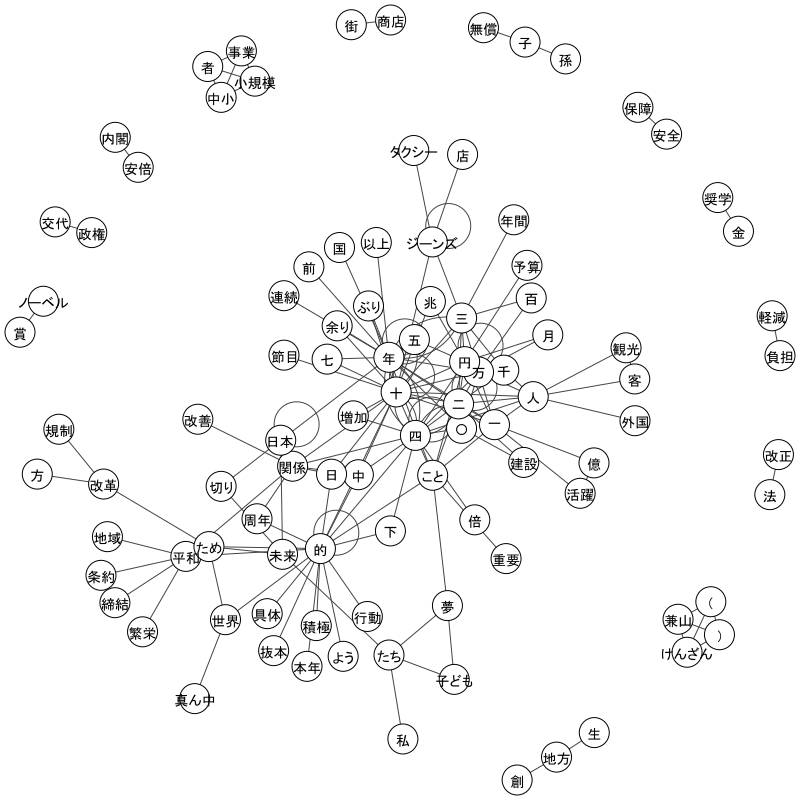

In [29]:
# -*- coding: utf-8 -*-
# リスト 5-6 施政方針演説のネットワークの構造を分析する例
# minfreqを4以上にしないといけないのでは？
import re
import numpy as np
from collections import Counter
import MeCab
import itertools
from igraph import *
from aozora import Aozora
minfreq = 4                   # グラフ描画のときは4に設定し、見やすくする
m = MeCab.Tagger("-Ochasen")  # MeCabで品詞分解する
 
def readin(filename):
    with open(filename, "r", encoding='utf-8') as afile:
        whole_str = afile.read()
    sentenses = (re.sub('。', '。\n', whole_str)).splitlines()
    return [re.sub('　', '', u) for u in sentenses if len(u)!=0]
 
filename = "abe.txt"
string = readin(filename)
 
# 文単位で形態素解析し、名詞だけ抽出し、基本形を文ごとのリストにする
sentensemeishilist = [ \
    [v.split()[2] for v in m.parse(sentense).splitlines() \
       if (len(v.split())>=3 and v.split()[3][:2]=='名詞')] \
    for sentense in string]

# 文ごとにペアリストを作る
doubletslist = [ \
    list(itertools.combinations(meishilist,2)) \
       for meishilist in sentensemeishilist if len(meishilist) >=2 ]
alldoublets = []
for u in doubletslist:  # 文ごとのペアリストのリストをフラットなリストにする
    alldoublets.extend(u)

# 名詞ペアの頻度を数える
dcnt = Counter(alldoublets)

# 出現頻度順にソートした共起ペアを出力する（上位30ペア）
print('pair frequency', sorted(dcnt.items(), key=lambda x: x[1], \
      reverse=True)[:30]) # 頻度順に表示
# 名詞ペアの頻度辞書から、頻度が4以上のエントリだけを抜き出した辞書を作る
restricteddcnt = dict( ( (k, dcnt[k]) for k in dcnt.keys() if dcnt[k]>=minfreq ) )
charedges = restricteddcnt.keys()
vertices = list(set( [v[0] for v in charedges] + [v[1] for v in charedges] ))
 
# charedgesは(['名詞','名詞'])の形なのでvertid(数字)ペア([1,3])に変換する
edges = [(vertices.index(u[0]), vertices.index(u[1])) for u in charedges]

g = Graph(vertex_attrs={"label": vertices, "name": vertices}, \
          edges=edges, directed=False)
plot(g, vertex_size=30, bbox=(800,800), vertex_color='white')

In [32]:
# （参考）上記セルの変数
print('文毎の名詞リスト:\r\n' + str(sentensemeishilist[:3]))
print('文毎の共起名詞リスト:\r\n' + str(doubletslist[0]))

文毎の名詞リスト:
[['冒頭', '天皇陛下', '公務', '負担', '軽減', '等'], ['現在', '有識者', '会議', '検討', '論点', '整理', '予定'], ['静か', '環境', '中', '国民', '的', '理解', '下', '成案', '考え']]
文毎の共起名詞リスト:
[('冒頭', '天皇陛下'), ('冒頭', '公務'), ('冒頭', '負担'), ('冒頭', '軽減'), ('冒頭', '等'), ('天皇陛下', '公務'), ('天皇陛下', '負担'), ('天皇陛下', '軽減'), ('天皇陛下', '等'), ('公務', '負担'), ('公務', '軽減'), ('公務', '等'), ('負担', '軽減'), ('負担', '等'), ('軽減', '等')]


In [7]:
# 平均経路長と経路長の分布
# minfreq = 0 で計算した結果
print('average path length', g.average_path_length())
print("path length hist\n", g.path_length_hist())

average path length 2.6680655422202024
path length hist
 N = 785631, mean +- sd: 2.6681 +- 0.6178
Each * represents 7386 items
[1, 2): * (14526)
[2, 3): ************************************* (277371)
[3, 4): ************************************************************* (450585)
[4, 5): ***** (40805)
[5, 6):  (2192)
[6, 7):  (152)


In [8]:
# 頂点の次数
# 次数とは、頂点が持つ辺の数のこと。ここでは、ある形態素がいかに多くの他の語と共起しているかを示す。
# g.degree()で、グラフgのすべての頂点の次数を求められる。
# 単語間のつながりが多いということは、その単語が重要である、話題の中心になっていると考えられる。
degreelist = zip(vertices, g.degree())
print(sorted(degreelist, key=lambda x: x[1], reverse=True)[:30])

[('十', 320), ('的', 316), ('年', 288), ('こと', 286), ('二', 257), ('一', 224), ('ため', 219), ('三', 211), ('四', 210), ('たち', 193), ('化', 190), ('世界', 183), ('五', 180), (')', 177), ('(', 176), ('皆さん', 169), ('下', 165), ('平和', 162), ('者', 158), ('経済', 149), ('人', 143), ('中', 139), ('国', 130), ('未来', 129), ('改革', 129), ('日本', 125), ('よう', 123), ('支援', 121), ('改善', 120), ('自由', 118)]


In [20]:
# 中心性
# 一般には他の頂点との距離が小さい頂点ほどより中心的であると考えられる。距離の決め方はいくつかあるので、それを以下で紹介していく。
# 次数中心性：上記頂点の次数を正規化した値
print("degree centrality:\r\n", sorted( zip(vertices, [u/(len(g.degree())-1) for u in list(g.degree())]), key=lambda x: x[1], reverse=True)[:30])

degree centrality:
 [('十', 0.2553870710295291), ('的', 0.25219473264166004), ('年', 0.2298483639265762), ('こと', 0.22825219473264166), ('二', 0.20510774142059057), ('一', 0.1787709497206704), ('ため', 0.174780526735834), ('三', 0.16839584996009577), ('四', 0.16759776536312848), ('たち', 0.15403032721468476), ('化', 0.1516360734237829), ('世界', 0.14604948124501196), ('五', 0.14365522745411013), (')', 0.1412609736632083), ('(', 0.14046288906624102), ('皆さん', 0.13487629688747008), ('下', 0.13168395849960096), ('平和', 0.12928970470869913), ('者', 0.12609736632083002), ('経済', 0.1189146049481245), ('人', 0.11412609736632083), ('中', 0.11093375897845172), ('国', 0.10375099760574621), ('未来', 0.10295291300877893), ('改革', 0.10295291300877893), ('日本', 0.09976057462090981), ('よう', 0.09816440542697526), ('支援', 0.0965682362330407), ('改善', 0.09577015163607343), ('自由', 0.09417398244213887)]


In [22]:
# 離心中心性(eccentricity centrality)：他の頂点との距離の最大値を取る決め方
# 近接中心性(closeness)：他の頂点との距離の合計を用いる決め方
# 固有ベクトル中心性（eigenvalue-based centrality）：隣接頂点の重要性も加味した中心性。
# 媒介中心性（betweenness centrality）：経由性を尺度とした中心性
print("eccentricity centrality:\r\n", sorted( zip(vertices, [1/u for u in list(g.eccentricity())]), key=lambda x: x[1], reverse=True)[:30])
print('\r\n')
print("closeness:\r\n",  sorted( zip(vertices, list(g.closeness())), key=lambda x: x[1], reverse=True)[:30] )
print('\r\n')
print("eigenvalue-based centrality:\r\n",  sorted( zip(vertices, list(g.evcent())), key=lambda x: x[1], reverse=True)[:30] )
print('\r\n')
print("betweenness:\r\n",  sorted( zip(vertices, list(g.betweenness())), key=lambda x
: x[1], reverse=True)[:30] )

eccentricity centrality:
 [('本年', 0.3333333333333333), ('学校', 0.25), ('ＥＰＡ', 0.25), ('友好', 0.25), ('法', 0.25), ('児童', 0.25), ('対応', 0.25), ('億', 0.25), ('努力', 0.25), ('変化', 0.25), ('節目', 0.25), ('施設', 0.25), ('医療', 0.25), ('皆さん', 0.25), ('二', 0.25), ('自動', 0.25), ('型', 0.25), ('災害', 0.25), ('事実', 0.25), ('繁栄', 0.25), ('自由', 0.25), ('拡大', 0.25), ('我が国', 0.25), ('様々', 0.25), ('災', 0.25), ('ふるさと', 0.25), ('多様', 0.25), ('病院', 0.25), ('方々', 0.25), ('維持', 0.25)]


closeness:
 [('十', 0.5410189982728842), ('こと', 0.540785498489426), ('的', 0.5389247311827957), ('年', 0.5370767252464638), ('二', 0.5247068676716918), ('ため', 0.5240485152655793), ('一', 0.5205650186954716), ('四', 0.5179826374534932), ('三', 0.5177685950413223), ('たち', 0.515850144092219), ('皆さん', 0.50997150997151), ('世界', 0.5056497175141242), ('化', 0.5054457442517144), ('下', 0.5038198632891033), ('五', 0.5018021625951141), ('経済', 0.5012), ('未来', 0.49525691699604746), ('平和', 0.4948657187993681), ('(', 0.494475138121547), (')', 0.4944751381

In [27]:
# クリークの分析
# クリーク：グラフ内部で密度が1、つまり、張ることのできる全ての辺の数に対する実際に張られている辺の数の比率が1である部分グラフ
# これ以上頂点を追加できないクリーク（maximal cliques）
# 概念を連想させる語の塊を抽出できる。
print('maximal cliques', \
  [ [vertices[v] for v in u] for u in list(g.maximal_cliques()) ] [:20])

maximal cliques [['先人', 'たち'], ['聖地', 'ジーンズ'], ['はじめ', '一'], ['気概', '今'], ['序文', '学制'], ['わり', '七'], ['末代', '土産', 'ハマグリ'], ['土産', 'ハマグリ', '江戸'], ['軸', 'こと', 'それ'], ['不変', 'これ', '原則'], ['ひとつ', '壁', '一つ'], ['フェアプレー', '選手', '観客'], ['架け橋', 'アジア', '沖縄'], ['争い', '今', '世界'], ['憎しみ', '人々', '連鎖', '多く'], ['業者', '悪質', '年寄り', '後'], ['勇気', '自信', '日本', '全体'], ['不安', '論', '悲観', '蔓延'], ['悲観', '論', '完全'], ['行政', '視点', '改革', '民間']]


In [28]:
# maximal cliquesの中で大きさが最大のクリーク（largest cliques）
print('largest cliques', \
    [ [vertices[v] for v in u] for u in list(g.largest_cliques()) ] [:20])

largest cliques [['的', '互恵', '友好', '努力', '節目', '繁栄', '責任', '地域', '来年', '四', 'こと', '国交', '正常', '下', '機', '中', '日', '平和', '自覚', '本年', '五', '十', '原則', '周年', '観点', '戦略', '条約', '大局', '改善', '締結', '化', '関係']]


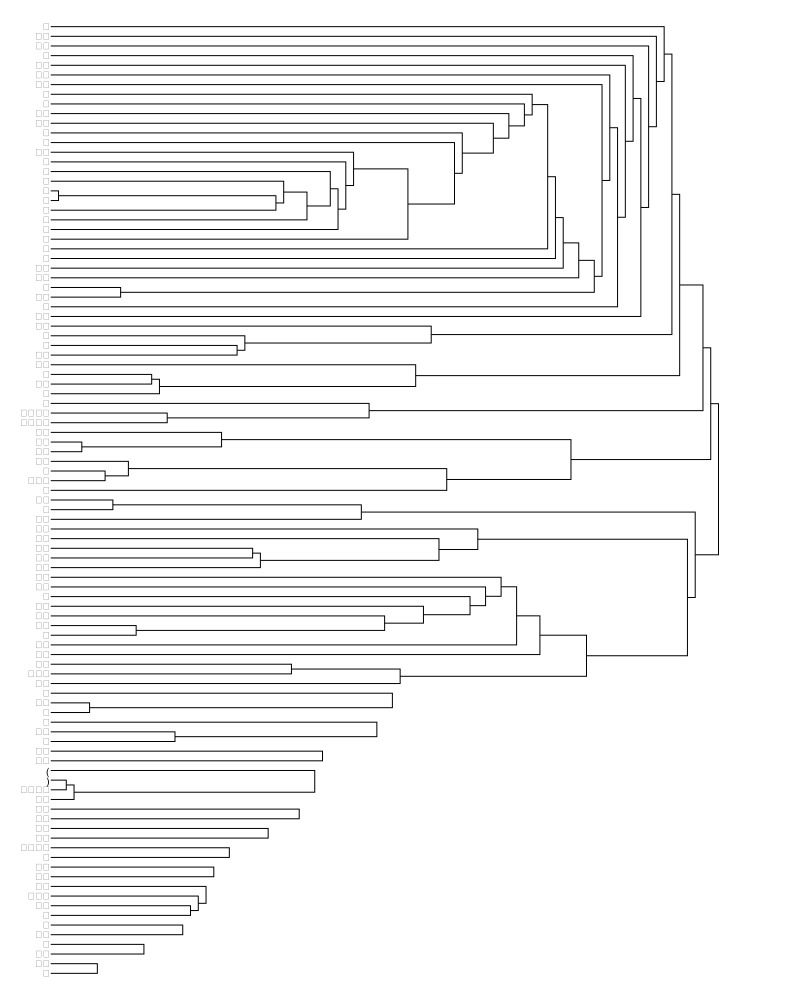

In [34]:
# コミュニティの分析
# 辺の媒介中心性：ある辺が頂点間の最短経路上にある程度のこと。
# 辺の媒介中心性が最大である辺を見つけてその辺を抜き取り、残りのグラフに対して再度媒介中心性最大の辺を抜き取る、を繰り返し、グラフを分割する。
# minfreq = 4で計算。デンドログラムの形態素が文字化けしている。。。
plot(g.community_edge_betweenness(), bbox=(800, 1000))

community info map Clustering with 99 elements and 22 clusters
[ 0] 四, 具体, 改善, 本年, 行動, 倍, 下, 周年, 抜本, 的, よう, 中, 日, 積極, 関係
[ 1] 千, 〇, 年間, 二, 予算, 万, 五, 三, 月, 円, 建設, 兆, 百
[ 2] 以上, 重要, 節目, 余り, こと, 十, ぶり, 前, 国, 増加, 七, 年, 連続
[ 3] 改革, 方, 規制, 世界, 真ん中, ため
[ 4] 条約, 繁栄, 締結, 地域, 平和
[ 5] 事業, 中小, 小規模, 者
[ 6] ), (, 兼山, けんざん
[ 7] 外国, 客, 人, 観光
[ 8] 夢, たち, 子ども, 私
[ 9] 創, 地方, 生
[10] 孫, 無償, 子
[11] 億, 一, 活躍
[12] 未来, 切り, 日本
[13] 負担, 軽減
[14] 交代, 政権
[15] 街, 商店
[16] 奨学, 金
[17] 安全, 保障
[18] 法, 改正
[19] ノーベル, 賞
[20] 安倍, 内閣
[21] 店, ジーンズ, タクシー


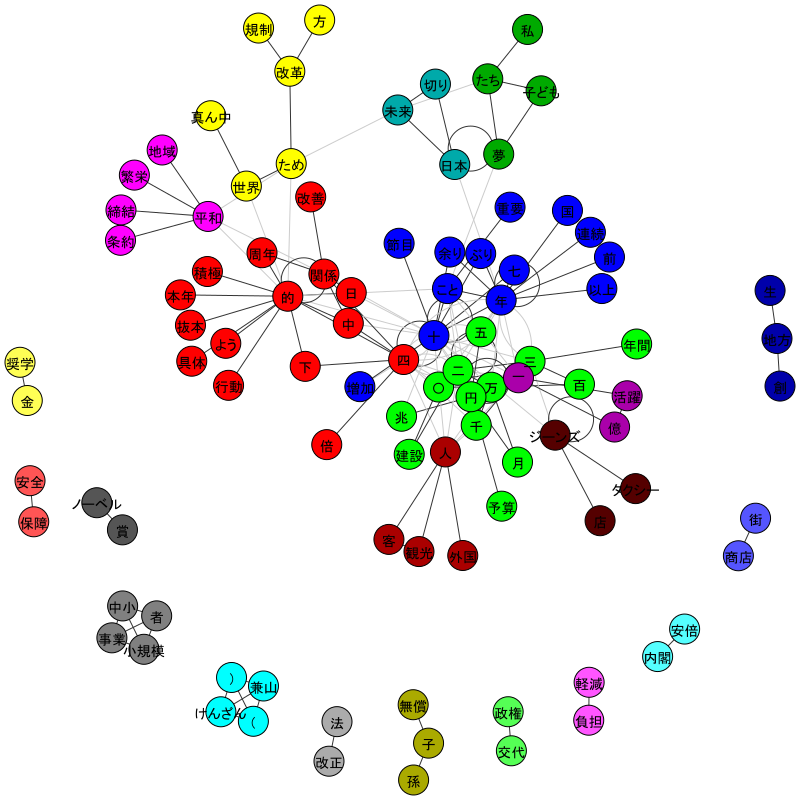

In [30]:
# 他のコミュニティの計算方法：RosvallとBergstomのinfogram
# クラスタ毎に色分けができ、分かりやすい。
print('community info map', g.community_infomap())
plot(g.community_infomap(), vertex_size=30, bbox=(800,800), )

In [ ]:
# iterableからlength文の要素を取り出し、まとめ直す（重複除外）。
# 例：itertools.combinations('ABCD', 2) --> AB AC AD BC BD CD
itertools.combinations(iterable, length)

### TF-IDF
入力したコーパスの形態素一覧と文書一覧に対して、それぞれのTF-IDF値を求める。   
TF-IDFを用いて、文書をベクトル化することで、cos類似度も計算できる。

In [1]:
# -*- coding: utf-8 -*-
# リスト 5-7 『吾輩は猫である』の先頭 3 文の TF-IDF を求めるプログラム例
# 入力するコーパス：①『吾輩は猫である』の冒頭3文を文単位で区切った3つの文書、②①に含まれる形態素一覧
# ①②のTF-IDF行列を作る。
import re
import numpy as np
import MeCab
from aozora import Aozora
from sklearn.feature_extraction.text import TfidfVectorizer
aozora = Aozora("wagahaiwa_nekodearu.txt")

# 文に分解する
string = '\n'.join(aozora.read())
string = re.sub('　', '', string)
string = re.split('。(?!」)|\n', re.sub('　', '', string))
while '' in string:  string.remove('')  # 空行を除く
m = MeCab.Tagger("-Owakati")            # MeCabで分かち書きにする
wakatilist = []
for sentense in string:
    # 文末に挿入される改行をrstripで除去する
    wakatilist.append(m.parse(sentense).rstrip())

wakatilist = np.array(wakatilist)  # scikit-learnの入力とするためにNumPyのnarrayに変換
wakatilist = wakatilist[3:6]       # 先頭の3行分だけを入力にする

vectorizer = TfidfVectorizer(use_idf=True, norm=None, \
                             token_pattern=u'(?u)\\b\\w+\\b')
   # norm=Noneは、出力を行ごとのベクトルと見たときに長さを1にする（正規化）処理をしないように指定
tfidf = vectorizer.fit_transform(wakatilist)
print(tfidf.toarray())             # 出力を表示


[[1.69314718 0.         0.         0.         0.         1.28768207
  0.         0.         0.         1.28768207 0.         0.
  1.69314718 0.         1.69314718 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.28768207 1.69314718 1.69314718
  0.         1.69314718 0.         0.         0.        ]
 [0.         1.69314718 1.69314718 1.69314718 1.69314718 1.28768207
  1.69314718 1.69314718 1.69314718 0.         0.         0.
  0.         0.         0.         1.69314718 1.69314718]]


d:\0.programs\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [22]:
# -*- coding: utf-8 -*-
# リスト 5-8  『吾輩は猫である』『三四郎』『こころ』の TF-IDF を計算するプログラム例
# 計算対象とする品詞を名詞のみに限定するといい感じになる。（早よ実装しろ）
import numpy as np
import pandas as pd
import MeCab
from aozora import Aozora
from sklearn.feature_extraction.text import TfidfVectorizer
#
aozoradir = "./"
m = MeCab.Tagger("-Owakati")  # MeCabで分かち書きにする

files = ['wagahaiwa_nekodearu.txt', 'sanshiro.txt', 'kokoro.txt']
readtextlist = [Aozora(aozoradir + u) for u in files]
stringlist = ['\n'.join(u.read()) for u in readtextlist]
wakatilist = [m.parse(u).rstrip() for u in stringlist]
wakatilist = np.array(wakatilist)

# norm=Noneでベクトルの正規化（長さを1にする）をやめる
vectorizer = TfidfVectorizer(use_idf=True, norm=None, \
                             token_pattern=u'(?u)\\b\\w+\\b')

tfidf = vectorizer.fit_transform(wakatilist)
tfidfpd = pd.DataFrame(tfidf.toarray())     # pandasのデータフレームに変換する
itemlist = sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1])
tfidfpd.columns = [u[0] for u in itemlist]  # 欄の見出し（単語）を付ける

for u in tfidfpd.index:
   print(tfidfpd.T.sort_values(by=u, ascending=False).iloc[:10 ,u])
   # 行と列を転置したものを、それぞれの文書に対して降順にソートし、先頭50語を表示

の    9193.0
て    6873.0
は    6424.0
に    6267.0
を    6071.0
と    5515.0
が    5339.0
た    3987.0
で    3805.0
も    2474.0
Name: 0, dtype: float64
の      4541.000000
た      4092.000000
て      3968.000000
は      3452.000000
に      3429.000000
を      3211.000000
が      2867.000000
と      2443.000000
で      1803.000000
三四郎    1544.150229
Name: 1, dtype: float64
の    5798.0
た    5392.0
は    4146.0
に    4100.0
て    3402.0
を    3214.0
私    2695.0
が    2194.0
と    2036.0
で    1509.0
Name: 2, dtype: float64


d:\0.programs\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [33]:
# （参考）上記セルの変数
tfidfpd #indexに文章（吾輩は猫であるor三四郎orこころ）、columnsに形態素一覧が格納されており、各値はTF-IDF値

,1,10,2,3,a,affect,agnodice,akin,aliud,amaranth,...,９,ａ,ｂ,ｃ,ｈ,ｋ,ｔ,ｗ,ｘ,ｚ
0,5.079442,0.000000,10.158883,3.386294,3.863046,0.000000,6.772589,0.000000,1.693147,0.000000,...,0.000000,1.693147,1.693147,1.693147,1.693147,1.287682,6.772589,3.386294,1.693147,3.386294
1,0.000000,3.386294,0.000000,0.000000,1.287682,1.693147,0.000000,3.386294,0.000000,1.693147,...,1.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,529.237332,0.000000,0.000000,0.000000,0.000000


In [1]:
### TF-IDFのベクトルを比較したcos類似度
# cos類似度は、ベクトル1とベクトル2の内積で表される。pandasのdotメソッドで計算できる。
# ベクトルの長さを1に正規化することで、内積はcosθとなる。その時、値が1に近い程挟む角θが0に近いことになる。
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import MeCab
from aozora import Aozora
from sklearn.feature_extraction.text import TfidfVectorizer
#
aozoradir = "./"
m = MeCab.Tagger("-Owakati")  # MeCabで分かち書きにする

files = ['wagahaiwa_nekodearu.txt', 'sanshiro.txt', 'kokoro.txt']
readtextlist = [Aozora(aozoradir + u) for u in files]
stringlist = ['\n'.join(u.read()) for u in readtextlist]
wakatilist = [m.parse(u).rstrip() for u in stringlist]
wakatilist = np.array(wakatilist)

# norm='l2'でベクトルの正規化（長さを1にする）を実行する。
vectorizer = TfidfVectorizer(use_idf=True, norm='l2', \
                             token_pattern=u'(?u)\\b\\w+\\b')

tfidf = vectorizer.fit_transform(wakatilist)
tfidfpd = pd.DataFrame(tfidf.toarray())     # pandasのデータフレームに変換する
itemlist = sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1])
tfidfpd.columns = [u[0] for u in itemlist]  # 欄の見出し（単語）を付ける

for u, v in [(0, 1), (0, 2), (1, 2), (0, 0), (1, 1)]:
   x = (tfidfpd.iloc[u, :]).dot(tfidfpd.iloc[v, :])
   print(x)

# 1行目は「吾輩は猫である」と「三四郎」のcos類似度
# 2行目は「吾輩は猫である」と「こころ」のcos類似度
# 3行目は「三四郎」と「こころ」のcos類似度
# 4行目は「吾輩は猫である」と「吾輩は猫である」のcos類似度
# 5行目は「三四郎」と「三四郎」のcos類似度

0.9475907586393989
0.9040745100895475
0.9266652269001506
0.9999999999999726
0.9999999999999529


d:\0.programs\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


### KWIC
Keyword in Context。それが意味するところは、検索キーワード（ここでは「吾輩」）が中央にあり、その前後の文脈を表示する形。

In [11]:
# -*- coding: utf-8 -*-
# リスト 5-9 「吾輩」をキーワードにした KWIC 検索プログラム例
# NLTK Concordanceの情報は  http://www.nltk.org/api/nltk.html
from aozora import Aozora
import MeCab
import nltk

aozora = Aozora("wagahaiwa_nekodearu.txt")
m = MeCab.Tagger("-Owakati -b65535")   # MeCabのインスタンス生成（分かち書き）
string = m.parse( '\n'.join(aozora.read()) )  # 分かち書きに変換する
# NLTKでトークン化しTextのフォーマットに変換する
text = nltk.Text( nltk.word_tokenize(string) )

word = '吾輩'                        # 検索語 
# ConcordanceIndexクラスのインスタンス生成、入力textを指定
c = nltk.text.ConcordanceIndex( text )
c.print_concordance(word, width=40)  # 検索語wordでKWIC形式を表示
print('\r\n検索文のオフセット：\r\n', c.offsets(word))               # 検索語wordの位置情報を得る

Displaying 25 of 482 matches:
                   吾輩 は 猫 で ある 夏目 漱石 一 吾
                   吾輩 は 猫 で ある 。 名前 は まだ
事 だけ は 記憶 し て いる 。 吾輩 は ここ で 始め て 人間 という
し て 見る と 非常 に 痛い 。 吾輩 は 藁 の 上 から 急 に 笹原 
 向う に 大きな 池 が ある 。 吾輩 は 池 の 前 に 坐っ て どう 
 破れ て い なかっ た なら 、 吾輩 は ついに 路傍 に 餓死 し た 
根 の 穴 は 今日 に 至る まで 吾輩 が 隣家 の 三 毛 を 訪問 する
 て おっ た の だ 。 ここ で 吾輩 は 彼 の 書生 以外 の 人間 を
 書生 より 一層 乱暴 な 方 で 吾輩 を 見る や 否や いきなり 頸筋 
 どうしても 我慢 が 出来 ん 。 吾輩 は 再び おさん の 隙 を 見 て
間もなく また 投げ出さ れ た 。 吾輩 は 投げ出さ れ て は 這い 上り
やっと 胸 の 痞 が 下り た 。 吾輩 が 最後 に つまみ出さ れよ う 
ながら 出 て 来 た 。 下女 は 吾輩 を ぶら下げ て 主人 の 方 へ 
 下 の 黒い 毛 を 撚り ながら 吾輩 の 顔 を しばらく 眺め て おっ
 た 。 下女 は 口惜し そう に 吾輩 を 台所 へ 抛り出し た 。 かく
台所 へ 抛り出し た 。 かくして 吾輩 は ついに この 家 を 自分 の 
る 事 に し た の で ある 。 吾輩 の 主人 は 滅多 に 吾輩 と 顔
る 。 吾輩 の 主人 は 滅多 に 吾輩 と 顔 を 合せる 事 が ない 。
よう な 勤勉 家 で は ない 。 吾輩 は 時々 忍び足 に 彼 の 書斎 
 毎夜 繰り返す 日課 で ある 。 吾輩 は 猫 ながら 時々 考える 事 が
とか 不平 を 鳴らし て いる 。 吾輩 が この 家 へ 住み込ん だ 当時
て くれ ない の で も 分る 。 吾輩 は 仕方 が ない から 、 出来 
が ない から 、 出来 得る 限り 吾輩 を 入れ て くれ た 主人 の 傍
床 へ 入っ て 一間 へ 寝る 。 吾輩 は いつ 

### ネガポジ分析
感情値の表現方法には、以下の考え方がある。
- 肯定的か否定的かの2値
- 肯定的か否定的か中立かの3択
- 肯定的を+1、否定的を-1として（もしくは区間[M, -M]）その間の連続値

感情値辞書（日本語）
- [単語感情極性対応表](http://www.lr.pi.titech.ac.jp/~takamura/pndic_ja.html)： 約55000語に-1～+1の感情極性値が付けられている。
- [日本語評価極性辞書](http://www.cl.ecei.tohoku.ac.jp/index.php?Open%20Resources%2FJapanese%20Sentiment%20Polarity%20Dictionary)
- [Polar Phrase Dictionary](http://www.tkl.iis.u-tokyo.ac.jp/~kaji/polardic/)

感情値辞書（英語）
- AFINN-111: 2477個の語句が-4から4までの整数の感情値を振られている。  
[AFINNのダウンロードURL](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/6010/zip/imm6010.zip)
- SentiWordNet： 意味辞書であるWordNetに掲載されている概念単位に対して、感情値を割り振ろうとするもの。
- VADER： 辞書とルールの組み合わせで感情値を求める。7516語のエントリを持つ。  以下のコードで要ダウンロード。
>import nltk  
>nltk.download('vader_lexicon')
- NaiveBayesClassifier： 機械学習を使った感情値判定システム。教師有学習。学習には以下のリンク先へGO.  
[映画の感想データ5331文のURL](http://www.cs.cornell.edu/people/pabo/movie-review-data/ "sentence polarity dataset v1.0")

In [7]:
# -*- coding: utf-8 -*-
# リスト 5-10 SentiWordNet による単語の感情値の和を求めるプログラム例
# strの文毎に感情値の合計値を算出するプログラム。
# 1文目は（good:3, terrible=-3, boring=-3）の合計値。2文目は（bad=-3）の合計値
from nltk.tokenize import *

AFINNfile = 'AFINN/AFINN-111.txt'
sentiment_dictionary = {}
for line in open(AFINNfile):  # AFINN-111辞書の読み込み
    word, score = line.split('\t')
    sentiment_dictionary[word] = int(score)

str = '''The first music is good, but the second and the third musics \
 are terrible and boring.  It is a bad idea to buy this CD.'''
for sent in sent_tokenize(str):
    words = word_tokenize(sent.lower())
    score = sum(sentiment_dictionary.get(word, 0) for word in words)
    print(score)

-3
-3


In [8]:
# 上記合計値を[正の感情値の合計, 負の感情値の合計値]の形式に正規化する。
result = []
for sent in sent_tokenize(str):
    print(sent)
    words = word_tokenize(sent.lower())
    pos = 0
    neg = 0
    for word in words:
        score = sentiment_dictionary.get(word, 0)
        if score > 0:
            pos += score
        if score < 0:
            neg += score
    result.append([pos, neg])
for u in result:
    print(u)

The first music is good, but the second and the third musics  are terrible and boring.
It is a bad idea to buy this CD.
[3, -6]
[0, -3]


感情値を単純に算出することができたが、以下のような懸念点について検討する必要があるだろう。
- 感情値の和は、文章の長さ（文字量）に依存している。そのため、文の長さを正規化する、語数で割るなどの対策が必要。
- 文毎に感情値を求める、という考え方でよいかどうか。
- 否定修飾語も正の値としてカウントしてしまう。例：not goodなど。
- 増幅修飾がカウントされない。例：very goodなど。
- 辞書にない単語がカウントされない。

In [9]:
# VADER辞書の活用(要ダウンロード。上記マークダウン参照)
# 結構楽に評価できる。顔文字も考慮されている！
# 結果の見方{compound: VADERで定義する総合的な感情の評価値, posやneg,neuは言うまでもないだろう。}
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()
sent = 'I am happy'
result = vader_analyzer.polarity_scores(sent)
print(sent + '\n', result)
sent_with_face = 'I am happy :)'
result2 = vader_analyzer.polarity_scores(sent_with_face)
print(sent_with_face + '\n', result2)

I am happy
 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
I am happy :)
 {'neg': 0.0, 'neu': 0.13, 'pos': 0.87, 'compound': 0.7717}


In [ ]:
# -*- coding: utf-8 -*-
# リスト 5-11 機械学習を使った感情判定のプログラム例
# サンプルで学習させようとしている映画の感想データはWinZipがないと展開できず、一旦断念した。
from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

def format_sentense(sentense):
    return {word: True for word in word_tokenize(sentense) }

pos_data = []
with open('rt-polaritydata/rt-polarity.pos', encoding='latin-1') as f:
    for line in f:
        pos_data.append([format_sentense(line), 'pos'])
neg_data = []
with open('rt-polaritydata/rt-polarity.neg', encoding='latin-1') as f:
    for line in f:
        neg_data.append([format_sentense(line), 'neg'])

# 学習データはそれぞれ前半4,000文ずつ
training_data = pos_data[:4000] + neg_data[:4000]
# 評価データはそれぞれ4,000以降の文
testing_data = pos_data[4000:] + neg_data[4000:]

# training_dataを使って分類気を作る
model = NaiveBayesClassifier.train(training_data)

s1 = 'This is a nice article'
s2 = 'This is a bad article'
print( s1, '--->', model.classify(format_sentense(s1)) )  # 2つの文例s1、s2で試す
print( s2, '--->', model.classify(format_sentense(s2)) )

print('accuracy', accuracy(model, testing_data))  # testing_dataを使って精度計算

In [31]:
# 日本語のネガポジ分析

import re
import MeCab
from aozora import Aozora

pndicfname = './pn_ja.dic'
aozora = Aozora('./wagahaiwa_nekodearu.txt')

# 単語感情極性対応表を「：」区切りで加工する関数
def readpndic(filename):
    with open(filename, 'r', encoding='utf8') as dicfile:
        items = dicfile.read().splitlines()
    return {u.split(':')[0]: u.split(':')[3] for u in items}

pndic = readpndic(pndicfname)

# 文に分解する
string = '\n'.join(aozora.read())
string = re.sub('　', '', string)
string = re.split('。(?!」)|\n', re.sub('　', '', string))
while '' in string:  string.remove('')      # 空行を除く

m = MeCab.Tagger("-Ochasen")                # MeCabで単語に分割する

# 文単位で形態素解析し、名詞だけ抽出し、基本形を文毎のリストにする
sentensewordlist = [ \
    [v.split()[2] for v in m.parse(sentense).splitlines() \
        if (len(v.split())>=3 and v.split()[3][:2] in ['名詞', '形容', '動詞', '副詞'])]
    for sentense in string]
for sentense in sentensewordlist[3:6]: #文3から文5までの単語リストについて
    for v in sentense:                 #それぞれの単語について
        print(v, pndic.get(v))         #感情極性値の辞書を引いて出力する
# 出力結果の値がNoneな語は、辞書に登録されていない、という意味である。

吾輩 None
猫 -0.689341
名前 -0.412125
まだ None
無い -0.54371
どこ None
生れる 0.945235
とんと -0.605903
見当 -0.739512
つく None


### WordNetによる類語検索
**概念**  
- synset：同義語のグループ。synsetは概念の関係（e.g. 上位概念、下位概念、部分関係、論理的含意）でお互いにリンクされている。  
  
**日本語版WordNetについて**  
Open Multilingual WordNetには、英語版WordNetのsynsetに対して、対応する訳語が用意されている。
- 語からsynsetへの変換の部分で、日本語入力が可能
- 日本語出力が可能になる
  
**使い方**  
NLTKからWordNetへアクセスするときは、WordNetパッケージをダウンロードする必要がある。以下、手順。  
ダウンロードしているかどうかも下記コード実行時のUIから確認可能なので、とりあえずやってみるとよい。

>import nltk  
>nltk.download()  

Corporaタブ → wordnet & wordnet_ic  
または
Collectionsタブ → all-Corpusでも可能。（こっちはダウンロードに時間がかかる。）

In [35]:
# 日本語版WordNet：Open Multilingual WordNet
from nltk.corpus import wordnet as wn
# synsetを日本語で検索する。
wn.synsets('鯨', lang='jpn')

[Synset('whale.n.02')]

In [38]:
# synsetに対応するlemmaを表示する時に日本語表示にする。
wn.synset('spy.n.01').lemma_names('jpn')

['いぬ',
 'スパイ',
 '回者',
 '回し者',
 '密偵',
 '工作員',
 '廻者',
 '廻し者',
 '探',
 '探り',
 '犬',
 '秘密捜査員',
 'まわし者',
 '諜報員',
 '諜者',
 '間者',
 '間諜',
 '隠密']

In [62]:
# WordNetの使い方：S.hoge()
orange = wn.synsets('ミカン', lang='jpn')[0]
print('ミカンの上位概念：', orange.hypernyms())
print('ミカンの下位概念：', orange.hyponyms())

apple = wn.synsets('リンゴ', lang='jpn')[0]
print('ミカンとリンゴの共通項：', orange.lowest_common_hypernyms(apple))

ミカンの上位概念： [Synset('citrus.n.01')]
ミカンの下位概念： [Synset('bitter_orange.n.02'), Synset('sweet_orange.n.01'), Synset('temple_orange.n.02')]
ミカンとリンゴの共通項： [Synset('edible_fruit.n.01')]


In [15]:
# -*- coding: utf-8 -*-
# リスト 5-12  英文 WordNet を NLTK から利用するプログラム例
# NLTK パッケージのファイル wordnet.py に含まれているデモプログラムから抜粋
# コメントアウトしている大半のコードは、使い方がよく分からなかったメソッド

# 前準備
import nltk
from nltk.corpus import wordnet
from nltk.corpus.reader import WordNetCorpusReader, WordNetICCorpusReader
wn = WordNetCorpusReader(nltk.data.find('corpora/wordnet'), None)
S = wn.synset
L = wn.lemma

# synsetの基本メソッド
s = S('go.v.21')        # 単語goの動詞の21番のsynsetを読み出す。
#s = S('google.v.0') #vをnに変えてることで、nounの結果を出力することも可能。
# synsetの名前がmove.v.15   pos（品詞名）がv   辞書ファイルがverb.competition
print('名前、品詞、辞書ファイル：', s.name(), s.pos(), s.lexname())
print('synset goの語彙：', s.lemma_names())  # synset goの語彙は['move', 'go']
print('定義：', s.definition())   # goの定義は"have a turn; make one's move in a game"
print('例文：', s.examples())     # goの例文は['Can I go now?']

名前、品詞、辞書ファイル： move.v.15 v verb.competition
synset goの語彙： ['move', 'go']
定義： have a turn; make one's move in a game
例文： ['Can I go now?']


In [31]:
# ドメイン：S.hoge_domains()
print('codeの話題ドメイン：', S('code.n.03').topic_domains())
    # topic domain [Synset('computer_science.n.01')]
print('pukkaの地域ドメイン：', S('pukka.a.01').region_domains())  # region domain [Synset('india.n.01')]
print('freakyの語法ドメイン：', S('freaky.a.01').usage_domains())  # usage domain [Synset('slang.n.02')]

codeの話題ドメイン： [Synset('computer_science.n.01')]
pukkaの地域ドメイン： [Synset('india.n.01')]
freakyの語法ドメイン： [Synset('slang.n.02')]


In [23]:
# リンクをたどってみる：S.hoge()
s = S('dog.n.01')
print(s)
print('上位概念は' ,s.hypernyms())
    # dogの上位概念は[Synset('canine.n.02'), Synset('domestic_animal.n.01')]
#print(L('zap.v.03.nuke').derivationally_related_forms())
    # [Lemma('atomic_warhead.n.01.nuke')]
#print(L('zap.v.03.atomize').derivationally_related_forms())
    # [Lemma('atomization.n.02.atomization')]

#print(s.member_holonyms())  # [Synset('canis.n.01'), Synset('pack.n.06')]
#print(s.part_meronyms())    # [Synset('flag.n.07')]
print('Austen変数が例になる上位概念の検索：', S('Austen.n.1').instance_hypernyms())
    # Austenが例であるような上位概念[Synset('writer.n.01')]
#print(S('composer.n.1').instance_hyponyms()[0:5])
    # 作家の例（作曲家が多数表示される）

print('faculty変数のmemberを表示：', S('faculty.n.2').member_meronyms())
    # 一部分（メンバー）[Synset('professor.n.01')]
#print(S('copilot.n.1').member_holonyms())
    # これが含まれる大きな集合[Synset('crew.n.01')]
print('table変数のパーツを表示：', S('table.n.2').part_meronyms())
    # 一部分[Synset('leg.n.03'), Synset('tabletop.n.01'), Synset('tableware.n.01')]
#print(S('course.n.7').part_holonyms())  # 含まれる集合[Synset('meal.n.01')]
print('water変数の材料：', S('water.n.1').substance_meronyms())
    # 一部分（材料）[Synset('hydrogen.n.01'), Synset('oxygen.n.01')]
print('gin変数の全材料：', S('gin.n.1').substance_holonyms())  # 含まれる集合（材料）
    # [Synset('gin_and_it.n.01'), Synset('gin_and_tonic.n.01'),
    #  Synset('martini.n.01'), Synset('pink_lady.n.01')]
print('snore変数から論理的に導かれる結論：', S('snore.v.1').entailments())  # 論理的な結論[Synset('sleep.v.01')]
print('heavy変数に似ている語彙：', S('heavy.a.1').similar_tos()) 
    #  [Synset('dense.s.03'), Synset('doughy.s.01'), Synset('heavier-than-air.s.01'),
    #   Synset('hefty.s.02'), Synset('massive.s.04'), Synset('non-buoyant.s.01'),
    #   Synset('ponderous.s.02')]
print('light変数の属性：', S('light.a.1').attributes())            # 属性[Synset('weight.n.01')]
print('heavy変数の属性：', S('heavy.a.1').attributes())            # 属性[Synset('weight.n.01')]

print('person変数の最上位概念：', S('person.n.01').root_hypernyms())
    # 意味トリーのルート[Synset('entity.n.01')]

Synset('dog.n.01')
上位概念は [Synset('canine.n.02'), Synset('domestic_animal.n.01')]
Austen変数が例になる上位概念の検索： [Synset('writer.n.01')]
faculty変数のmemberを表示： [Synset('professor.n.01')]
table変数のパーツを表示： [Synset('leg.n.03'), Synset('tabletop.n.01'), Synset('tableware.n.01')]
water変数の材料： [Synset('hydrogen.n.01'), Synset('oxygen.n.01')]
gin変数の全材料： [Synset('gin_and_it.n.01'), Synset('gin_and_tonic.n.01'), Synset('martini.n.01'), Synset('pink_lady.n.01')]
snore変数から論理的に導かれる結論： [Synset('sleep.v.01')]
heavy変数に似ている語彙： [Synset('dense.s.03'), Synset('doughy.s.01'), Synset('heavier-than-air.s.01'), Synset('hefty.s.02'), Synset('massive.s.04'), Synset('non-buoyant.s.01'), Synset('ponderous.s.02')]
light変数の属性： [Synset('weight.n.01')]
heavy変数の属性： [Synset('weight.n.01')]
person変数の最上位概念： [Synset('entity.n.01')]


In [25]:
# 二者の関係（二者の間で初めて共通する概念）：S.lowest_common_hypernyms()
print('personとdogについて、最初の共通項は：')
print(S('person.n.01').lowest_common_hypernyms(S('dog.n.01')))  # 初めて共通する概念
    # 結果は[Synset('organism.n.01')]
print('womanとgirlfriendについて、最初の共通項は：')
print(S('woman.n.01').lowest_common_hypernyms(S('girlfriend.n.02')))
    # 結果は[Synset('woman.n.01')]

personとdogについて、最初の共通項は：
[Synset('organism.n.01')]
womanとgirlfriendについて、最初の共通項は：
[Synset('woman.n.01')]


In [28]:
# 類似性指標。
print('dogとcatの意味トリーの距離：')
print(S('dog.n.01').path_similarity(S('cat.n.01')))   # パスで見たノードの近さ0.2
print('dogとwolfの意味トリーの距離：')
print(S('dog.n.01').path_similarity(S('wolf.n.01')))  # パスで見たノードの近さ0.333

dogとcatの意味トリーの距離：
0.2
dogとwolfの意味トリーの距離：
0.3333333333333333


In [29]:
# その他の類似性指標
#以下の指標の説明は、NLTKのドキュメント http://www.nltk.org/howto/wordnet.htmlにある
print('Leacock-Chosorowの類似度：', S('dog.n.01').lch_similarity(S('cat.n.01')))  # Leacock-Chosorowの類似度2.028
print('Wu-Palmerの類似度：', S('dog.n.01').wup_similarity(S('cat.n.01')))  # Wu-Palmer Similarity 0.857

wnic = WordNetICCorpusReader(nltk.data.find('corpora/wordnet_ic'), '.*\.dat')
ic = wnic.ic('ic-brown.dat')
print('Information ContentによるJiang-Conrathの類似度：', S('dog.n.01').jcn_similarity(S('cat.n.01'), ic))
    # Information ContentによるJiang-Conrathの類似度0.4498
ic = wnic.ic('ic-semcor.dat')
print('Information ContentによるLinの類似度：', S('dog.n.01').lin_similarity(S('cat.n.01'), ic))
    # Information ContentによるLinの類似度0.8863

Leacock-Chosorowの類似度： 2.0281482472922856
Wu-Palmerの類似度： 0.8571428571428571
Information ContentによるJiang-Conrathの類似度： 0.4497755285516739
Information ContentによるLinの類似度： 0.8863288628086228


### 構文解析と係り受け解析
- NLTKから使える英語の文法記述を含んだStanford PCFG Parser活用手順  
下記サイトから①jarファイル、②英語の言語モデルをダウンロードする。別途Java言語の実行環境も必要。  
[Stanford ParserのHP](https://nlp.stanford.edu/software/lex-parser.shtml)
 1. 「Download Stanford Parser version ***」からJavaのプログラムをダウンロード
 1. zipファイルを解凍して、「stanford-parser-full-2018-02-27」を入手。
 1. 英語の文法モデルファイルは「English Models」からダウンロード。※なぜかzipでない。edフォルダが見当たらない。
 1. zipファイルを解凍して、「stanford-english-corenlp-2017-06-09-models.jar」を入手。

- CaboCha  
[CaboChaのHP](https://taku910.github.io/cabocha/)  
C++で書かれている。   
 1. Windowsではあらかじめコンパイルされたパッケージをインストールする必要がある。
 1. コンパイルする場合には、漢字コード体系をUTF8に設定する。
 1. python/setup.pyを実行する。「python setup.py install」

In [ ]:
# -*- coding: utf-8 -*-
# リスト 5-13  Stanford Parser のテストプログラム
from nltk.parse.stanford import *
p = StanfordParser( \
    path_to_jar='stanford-parser-full-2018-02-27/stanford-parser.jar', \
    path_to_models_jar = 'edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz' )
out = p.raw_parse('This is a pen.')
for u in out:
    print(u)

In [ ]:
out = p.raw_parse_sents( ['This is a pen.', 'I have a book.'] )
for u in out:
    for v in u:
        print(v)

In [ ]:
dep_p = StanfordDependencyParser( \
    path_to_jar='stanford-parser-full-2018-02-27/stanford-parser.jar', \
    path_to_models_jar = 'edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz' )
out = [list(parse.triples()) for parse in dep_p.raw_parse( \
                   "The quick brown fox jumps over the lazy dog.")]
for u in out:
    print(u)

### 潜在的意味論
前提：同じ文脈で出現する語は同じような意味を持つというハリスの分布仮説  
手法：文脈を統計的に分析して意味情報を抽出  
アルゴリズム例：LSI(=LSA), pLSI, LDA, など  
パッケージ：gensim  
クラス：dictionaryとcorpusは必須

In [1]:
# -*- coding: utf-8 -*-
# リスト 2-7  潜在的意味解析モデルを使って話題を抽出するプログラム例
# LSALDAやWord2Vec等のライブラリを含むgensim
# 細かい説明は以下参照。http://hivecolor.com/id/58
from gensim import corpora, models, similarities
# textsをあらかじめ準備しておく（分かち書き文のリスト）
num_topics = 3
documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]
stoplist = set('for a of the and to in'.split()) #集合を手っ取り早く創りたい時、この書き方意外と役立つかも。
#分かち書きに相当する処理。stoplistsの形態素は無視する。
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]
# remove words that appear only once
# 空リスト[]にtextsのリストを足して、tokensをまとめる。
all_tokens = sum(texts, [])
#set(all_tokens) #typeを出したいとき
tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
texts = [[word for word in text if word not in tokens_once]
         for text in texts]

dictionary = corpora.Dictionary(texts)  # 入力textsリストをdictionaryに変換。トークンをまとめる。
#dictionary.save_as_text('./dictionary.dict') #dictionaryをテキストファイルに書き出し。
corpus = [dictionary.doc2bow(text) for text in texts]  # corpusを作成
#tfidfの計算方法は以下参照。http://tawara.hatenablog.com/entry/2016/11/08/021408
tfidf = models.TfidfModel(corpus)       # TFIDFモデルを作成
corpus_tfidf = tfidf[corpus]            # corpusをTF-IDFで重要語のみに変換
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)
                                        # corpus_tfidfからLSIモデルを作成
# トピックの表示
print(lsi.show_topics(num_topics, formatted=True))     # topicを表示
corpus_lsi = lsi[corpus_tfidf]          # corpus_tfidfのすべての文をLSIに変換
for doc in corpus_lsi:
    x = [ sorted(doc, key=lambda u: u[1], reverse=True) for u in doc if len(u)!=0]
    print(x)

D:\0.programs\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[(0, '0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"response" + 0.060*"time" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"'), (1, '0.460*"system" + 0.373*"user" + 0.332*"eps" + 0.328*"interface" + 0.320*"response" + 0.320*"time" + 0.293*"computer" + 0.280*"human" + 0.171*"survey" + -0.161*"trees"'), (2, '0.456*"time" + 0.456*"response" + -0.352*"eps" + -0.340*"human" + -0.318*"interface" + -0.277*"system" + 0.272*"survey" + 0.213*"user" + -0.183*"trees" + 0.114*"minors"')]
[[(1, 0.5200703306361845), (0, 0.06600783396090529), (2, -0.37649581219168893)], [(1, 0.5200703306361845), (0, 0.06600783396090529), (2, -0.37649581219168893)], [(1, 0.5200703306361845), (0, 0.06600783396090529), (2, -0.37649581219168893)]]
[[(1, 0.7609563167700035), (2, 0.5080674581001661), (0, 0.19667592859142588)], [(1, 0.7609563167700035), (2, 0.5080674581001661), (0, 0.19667592859142588)], [(1, 0.7609563167700035), (2, 0.5080674581001661), (0, 0.196675928591425

### gensimのdictionary
書き方：dictionary = corpora.Dictionary(texts)  
入力値：形態素解析した結果リスト（例：[[形態素1, 形態素2, 形態素3], [文2の形態素リスト], [文3の形態素リスト]...]）  
出力結果：gensimのdictionaryの中身（dictionary.dic参照）  

||||
|:-:|:-:|:-:|
|dictionaryのID|形態素|出現頻度|
|115|主義|3|
|331|予算|3|
|316|事情|4|
|203|事業|8|
|112|交代|6|

In [40]:
# corpusの見方
# 書き方：corpus = [dictionary.doc2bow(text) for text in texts]
# 入力値：形態素解析した結果リスト（例：[形態素1, 形態素2, 形態素3]）
# 入力値の形態素がdictionaryにあるかどうかチェックする。なければ無視される。
# あれば (dictionaryのID, 出現回数) の形でまとめられる。
corpus

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]

In [138]:
# -*- coding: utf-8 -*-
# リスト 5-15
# 各文書のトピックをLSIで抽出するプログラム
# 詳細は要調査だが、tf-idfの観点で重要と思われる形態素で各文をベクトル化し、10個分の文について処理している。
import numpy as np
import re, itertools, MeCab
from collections import defaultdict
from gensim import corpora, models, similarities
from pprint import pprint
from igraph import *

#テキストファイルを読み込んで、1文を要素とするリストを返す関数。
def readin(filename):
    with open(filename, "r", encoding='utf8') as afile:
        whole_str = afile.read()
    sentenses = (re.sub('。', '', whole_str)).splitlines()
    return [re.sub('　', '', u) for u in sentenses if len(u)!=0]

num_topics = 10
m = MeCab.Tagger("-Ochasen")  # MeCabで品詞分解する
filename = "abe.txt"
string = readin(filename)

# 文単位で形態素解析し、基本形を文ごとのリストにする
# 結果のイメージ：[[形態素1, 形態素2, 形態素3], [文2の形態素リスト], [文3の形態素リスト]...]
# len(v.split()) >=3の処理は末尾のEOSを無視するためである。
# v.split()[3][:2]の処理は品詞情報を文字列として格納した後（例：「接頭詞-名詞接続」）、最初の2文字を抽出する。
sentensewordlist = [ \
    [v.split()[2] for v in m.parse(sentense).splitlines()  \
    if (len(v.split()) >=3 and v.split()[3][:2] in ['名詞','動詞','形容','副詞'])] \
    for sentense in string]

# 各パラグラフの先頭4文字を抽出（図でパラグラフを示すときに使う）
# 節番号は除外するため、「一～十」が文頭の時は1文字ずらして抽出する。
headlist = [ \
    sentense[1:5] if sentense[0] in ['一', '二', '三', '四', '五', '六', '七', '八', '九', '十'] else 
    sentense[1:5] if sentense[0] in ['　', '（', '「'] else
    sentense[:4] for sentense in string]

# sentensewordlistからstoplistに含まれる語を取り除く
stoplist = {'が', 'は', 'に', 'も', 'の', 'を', 'へ', 'と', 'で', 'や', 'ば', \
 'だ', 'て', '一', '二', '三', '四', '五', '六', '七', '八', '九', '十', \
 '〇', '（', '）', '＊', '「', '」', '、', '。', 'ます', 'ある', 'こと', 'する', \
 'など', 'です', 'た', 'たち', 'その', '的', 'ため', 'いる', 'できる', 'れる', \
 'これ', 'なる', '化', ')', '(', '年', '円', '万'}
texts = [[word for word in doc if word not in stoplist] for doc in sentensewordlist]

# N回以上現れる語のみを抽出し、textsに格納する。
# defaultdictは便利な標準ライブラリのひとつ。キーが存在する場合はバリューを更新し、存在しない場合はキー:バリューを追加する。
# ここでは、textsに含まれるtokenをまとめる。
# 出力結果のイメージ：defaultdict(int,{'負担': 6,'軽減': 5})
frequency = defaultdict(int)
for text in texts: #textsに含まれる各文のリストについて、
    for token in text: #各文のリストに含まれる形態素について、 
        frequency[token] += 1 #tokenキーが存在すればバリュー+1、存在しなければキー：バリューを追加する。
texts = [[token for token in text if frequency[token] >= 3] for text in texts]

#下準備
#gensimの辞書に格納してcorpus作成
dictionary = corpora.Dictionary(texts)
#dictionary.save_as_text('./dictionary2.dict') #dictionaryをテキストファイルに書き出し。
corpus = [dictionary.doc2bow(text) for text in texts]
# TF-IDFの計算
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model
corpus_tfidf = tfidf[corpus]
# LSIモデルクラスのインスタンス生成。corpus_tfidfを入力、トピック数をnum_topicsに設定
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)
corpus_lsi = lsi[corpus_tfidf] # corpus_tfidfを処理
ttlist = []

# それぞれのトピックに最も影響する語のリスト（表5-11）
# lsi.show_topicsの出力を整形して表示
for t in lsi.show_topics(num_topics, formatted=False):
    tnum = t[0] #トピックNo.
    tlist = sorted(t[1], key=lambda u: u[1], reverse=True)[:3] #トピックに影響する語トップ3
    ttlist.append( [u[0] for u in tlist] )
    print(tnum, end='  ')
    for u in tlist:   
        print(u[0], "%.4f" % u[1], end='   ')
    print() #改行するために挿入

0  未来 0.2245   創る 0.2154   国 0.1937   
1  創る 0.3787   未来 0.3119   国 0.2716   
2  人 0.3957   観光 0.3210   壁 0.2097   
3  平和 0.3136   地域 0.2277   世界 0.1828   
4  教育 0.4274   ハマグリ 0.2127   再生 0.1804   
5  教育 0.3416   者 0.2242   事業 0.2076   
6  ハマグリ 0.3603   けんざん 0.2165   兼山 0.2165   
7  地方 0.3445   未来 0.2082   生 0.2024   
8  創る 0.2219   国 0.2084   ハマグリ 0.1652   
9  観光 0.1855   方 0.1540   人 0.1328   


In [147]:
# 10文について、主要なトピック（3単語で構成される）を複数抽出するプログラム（表5-12）
# 出力形式は、（文頭4文字、トピック、関与度）。関連トピックが複数ある場合、複数出力される。
# corpus_lsiの内容を整形して表示

# docにはこんな感じの結果が格納されている。[(0, 0.1948029593632325), (1, -0.09379186313901472)]
c = 0
for i, doc in enumerate(corpus_lsi):
    x = [ sorted(doc, key=lambda u: u[1], reverse=True) for u in doc if len(u)!=0]
    if len(x)!=0:
        print(headlist[i], end='  ')  # 段落番号の代わりにheadlistを使って表示
        for u in x[0][:3]:
            if (u[1] >= 0.1):
                print(ttlist[u[0]], np.round(u[1],3), end=' ')
        print()
    print('---')
    c += 1
    if c >= 11:
        break

まず冒頭  ['未来', '創る', '国'] 0.195 ['平和', '地域', '世界'] 0.128 
---
---
昨年末、  ['地方', '未来', '生'] 0.119 ['未来', '創る', '国'] 0.112 
---
我が国で  ['未来', '創る', '国'] 0.101 
---
明治維新  ['教育', 'ハマグリ', '再生'] 0.134 ['未来', '創る', '国'] 0.122 
---
しかし、  ['未来', '創る', '国'] 0.363 ['創る', '未来', '国'] 0.301 ['創る', '国', 'ハマグリ'] 0.12 
---
戦後七十  ['未来', '創る', '国'] 0.196 ['ハマグリ', 'けんざん', '兼山'] 0.185 ['教育', 'ハマグリ', '再生'] 0.161 
---
少子高齢  ['未来', '創る', '国'] 0.352 ['創る', '未来', '国'] 0.245 ['創る', '国', 'ハマグリ'] 0.109 
---
私たちの  ['未来', '創る', '国'] 0.362 ['創る', '未来', '国'] 0.322 ['ハマグリ', 'けんざん', '兼山'] 0.212 
---
世界の真  ['創る', '未来', '国'] 0.334 ['未来', '創る', '国'] 0.264 ['創る', '国', 'ハマグリ'] 0.177 
---
日米同盟  ['平和', '地域', '世界'] 0.195 
---


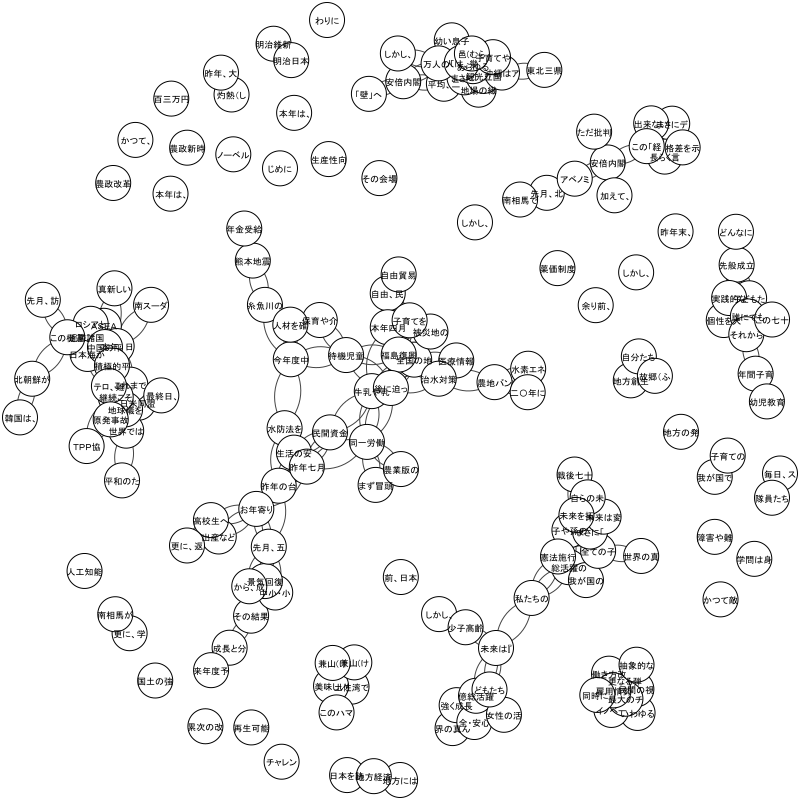

In [154]:
# 各文の類似度を計算し、一定の閾値以上の類似度を持つ文をグラフ表示するプログラム。（図5-10）
# グラフの塊が、クラスタである。

# lsi[corpus]の類似度を計算
index = similarities.MatrixSimilarity(lsi[corpus]) 
# 類似度を行列に成形
simmatrix = []
for doc in texts:
    doc = ' '.join(doc)
    vec_bow = dictionary.doc2bow(doc.split())
    vec_lsi = lsi[vec_bow]  # convert the query to LSI space
    sims = index[vec_lsi]   # 元のコーパスの文に対して類似度を計算
    simmatrix.append(sims)

# igraphによるグラフ化
minsim = 0.85
edges = []
vertices = headlist         # グラフの頂点はheadlistの文字列
for i, u in enumerate(simmatrix):
    for j, v in enumerate(u):
        if v >= minsim and i!=j:  # 値がminsim以上で、対角要素でなければ、辺行列に入れる
            edges.append([i, j])
g = Graph(vertex_attrs={"label": vertices}, edges=edges, directed=False)
plot(g, vertex_size=35, vertex_label_size=9, bbox=(800,800), vertex_color='white')

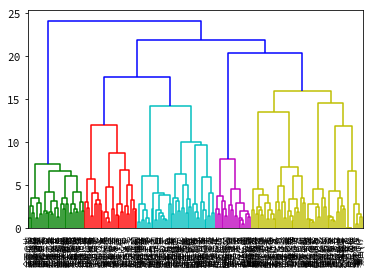

In [149]:
# 各文の類似度を距離として、階層的クラスタリングを行い、類似度樹形図を描くプログラム（図5-11）
# 類似度マトリックス（＝距離マトリックス）からデンドログラムへ出力
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
Z = linkage(simmatrix, 'ward')  # Ward法で階層化クラスタリング
dendrogram(                     # デンドログラムを描く
    Z,
    leaf_rotation=90.,          # x軸ラベルを90度回転
    leaf_font_size=8.,          # x軸ラベルのフォントを8ポイントにする
    labels=np.array(headlist),  # データラベルをheadlistから引用
)
plt.show()

### Word2Vec
前提：同じ文脈で出現する語は同じような意味を持つというハリスの分布仮説  
手法：ある語の意味を、前後の5-10語程度の語を窓として切り出して語ベクトルとして表す。その後、NNによって200次元程度に圧縮する。  
パッケージ：gensim  
特徴：
1. 同じ種類の名前が異なる種類に比べて近傍に来る。つまり、動物と植物のクラスタに分けると、ちゃんと動物名は動物クラスタに分類できる。
1. 語と語の関係性がベクトル空間上で保存される。つまり、100次元を2次元に圧縮しても、同じ向きを向いている。
1. 程度の違いを表す語がベクトル空間上で同じ直線上にある。つまり、good better bestとなること。
1. 異なる言語間でも、ベクトル空間の形が似ている。つまり、空間間の線形変換によって単語の対訳辞書ができそう。

以降、処理に日単位の時間がかかるとのことなので、処理は実行していない。

In [ ]:
# -*- coding: utf-8 -*-
#  リスト 5-16 Word2Vec の学習フェーズのプログラム例
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', \
                    level=logging.INFO)

# jpwall.txtがコーパスファイル名
sentences = gensim.models.word2vec.Text8Corpus("wp2txt/jpwall.txt")

# jpwall.txtを学習させる
model = gensim.models.word2vec.Word2Vec(sentences, min_count=5)
print("model gen complete")
model.save("jpwmodel")  # モデルをファイルに保存

In [ ]:
# -*- coding: utf-8 -*-
# リスト 5-17 Word2Vec の利用フェーズのプログラム例 1   単純な利用
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', \
                    level=logging.INFO)

model = gensim.models.word2vec.Word2Vec.load("jpwmodel")
print("model load complete")

# similarityチェック
print(model.most_similar(positive=[u'女性', u'王'], negative=[u'男性'], topn=5))
print(model.most_similar(positive=[u'パリ', u'フランス'], \
                         negative=[u'ベルリン'], topn=5))
print(model.similarity(u'ロンドン', u'東京'))

# 登録されている語のリストを取り出す
voc = model.vocab.keys()
# 語xのベクトルを取り出す。語が登録されていないとKeyError例外を返す
x = '東京'
wvec = model[x]

In [ ]:
# -*- coding: utf-8 -*-
# リスト 5-18  Word2Vec の利用フェーズのプログラム例 2    scikit-learn とあわせて単語をクラスタリングする
import gensim, logging
import scipy.spatial.distance
import scipy.cluster.hierarchy
import matplotlib
from matplotlib.pyplot import show
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', \
                    level=logging.INFO)

model = gensim.models.word2vec.Word2Vec.load("jpw-wakati-model")
print("model load complete")

wv = []
vocnew = []
voc = [u'ビール', u'日本酒', u'焼酎', u'蕎麦', u'スパゲッティ', 
    u'ハンバーグ', u'カレー', u'バラ', u'桜']
for x in voc:
    try:
        wv.append(model[x])
    except KeyError:
        print(x, u'を無視します')
    vocnew.append(x)

# linkage配列を作る
l = scipy.cluster.hierarchy.linkage(wv, method='average')  # method='ward'でもよい
# lをdentrogramに表現する
scipy.cluster.hierarchy.dendrogram(l, labels=vocnew)
show()

### 自然言語処理
- NLTKモジュール

In [8]:
# 自然言語処理のパッケージNLTK
# ダウンロードしたいコーパス等を選ぶ。
# 基本はCollcetionstタブのbookをダウンロードすればよい。
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
# -*- coding: utf-8 -*-
# 2.5.2節  NLTK に含まれるコーパスデータ　　NTLKのデータを表示する
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [12]:
# 中身を表示する。
c = 0
for u in text7:
    print(u, end=' ')
    if u=='.':
        print()
    c += 1
    if c == 99: #全編だと長いので途中で止める。
        break

Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 . 
Mr. Vinken is chairman of Elsevier N.V. , the Dutch publishing group . 
Rudolph Agnew , 55 years old and former chairman of Consolidated Gold Fields PLC , was named *-1 a nonexecutive director of this British industrial conglomerate . 
A form of asbestos once used * * to make Kent cigarette filters has caused a high percentage of cancer deaths among a group of workers exposed * to it more than 30 years ago , researchers reported 0 *T*-1 . 


In [25]:
# 1789年のワシントン大統領の就任演説のテキスト
from nltk.corpus import inaugural
inaugural.raw('1789-Washington.txt')[:775] #全編だと長いので途中で止める。

'Fellow-Citizens of the Senate and of the House of Representatives:\n\nAmong the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand,'

In [26]:
# 日本語のコーパスを参照する。
from nltk.corpus import jeita
jeita.readme()
#jeita.fileids() #コメントアウトを外すと,利用可能なコーパス名の一覧が得られる。

'\nJEITA Public Morphologically Tagged Corpus (in ChaSen format)\nJEITA 形態素解析済みコーパス (ChaSen 形式)\n\nCreated and distributed by Masato Hagiwara (http://lilyx.net/)\n作成＆配布 萩原 正人 (http://lilyx.net/)\n\n* About this corpus - 本コーパスについて\n\nThis copurs, JEITA Public Morphologically Tagged Corpus (in ChaSen format), is a public, automatically tagged (morphologically analyzed) corpus of Project Sugita Genpaku (http://www.genpaku.org/) and Aozora Bunko (http://www.aozora.gr.jp/), which themselves are freely available text collections like Project Gutenberg. The corpus data is originally distributed as "JEITA Public Morphologically Tagged Corpus" here:\n\n本コーパス 「JEITA 形態素解析済みコーパス (ChaSen 形式)」は、プロジェクト杉田玄白 (http://www.genpaku.org/) と青空文庫 (http://www.aozora.gr.jp/) のテキストを自動で形態素解析した、フリーで利用可能なタグ付きコーパスです。本コーパスは、本来、「JEITA 形態素解析済みコーパス」として、以下のページにおいて配布されているデータに基づいています。\n\nhttp://nlp.kuee.kyoto-u.ac.jp/NLP_Portal/jeita_corpus/index.html\n\nbut the files included in this copurs are not the original distribut

In [13]:
for word in jeita.words('g0173.chasen'):
    print(word, end=' ')

アメリカ 　 ペンシルバニア 　 ゲティスバーグ 近く の 戦場 にて ８７ 年 前 に 、 われわれ の 祖先 は この 大陸 に 新た な 国 を 作り上げ まし た 。 その 国 は 自由 という 理念 の 上 に 打ち立て られ 、 全て の 人 は 生まれながら に し て 平等 で ある という 考え に 捧げ られ て い まし た 。 いま われわれ は 大きな 内戦 の さなか に い ます 。 この 国 が 、 と いう より 自由 という 理念 の 上 に 打ち立て られ 、 全て の 人 は 生まれながら に し て 平等 で ある という 考え に 捧げ られ た 国 が 、 永続 する か どう か を 試さ れ て いる の です 。 われわれ は 、 この 戦争 の 激戦 の 戦場 に 集まっ て い ます 。 われわれ は 、 この 国 が 生き 永らえる よう 、 ここ で 命 を 投げ た した 人々 にとって 、 この 戦場 の 一部 を 最終 的 な 安息 の 地 として 捧げる ため に やってき まし た 。 われわれ が こう す べき な の は 、 まったく 正しく 適切 で あり ます 。 しかし 、 より 大きな 意味 で とらえれ ば 、 われわれ に は 捧げる こと は でき ませ ん 、 われわれ に は 呈 する こと は でき ませ ん 、 つまり われわれ に は この 地 を 捧げる こと は でき ない の です 。 勇敢 なる 者 で 、 生き残っ た に せよ 、 戦死 し た に せよ 、 ここ で 奮闘 し た もの だけ が 、 この 土地 を 捧げ て き た の です 。 われわれ の 微力 で は 、 それ に つけ加え たり 減じ たり する こと は でき ない の です 。 世界 は ここ で われわれ が 言っ た こと に は たいして 注意 を 払い も し なけれ ば 、 後世 まで 記憶 する こと も ない でしょ う 。 しかし 勇敢 なる もの が ここ で なしとげ た こと は 、 決して 忘れ られる こと は ない の です 。 ここ で 戦っ た もの が これ まで 気高く 推し進め て き た 未完 の 仕事 に 、 ここ で 新た に 身 

### 形態素解析器janome参考URL:   
[http://mocobeta.github.io/janome/]

In [2]:
# 文字化けする場合は、print(str(token).decode('utf8))などを試す。
from janome.tokenizer import Tokenizer
t = Tokenizer()
for token in t.tokenize('すもももももももものうち'):
    print(token)

すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ


In [3]:
# tfのワードカウント
# TokenCountFilter(att='base_form)とすると基本形の数を調べる。
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.tokenfilter import *

text = 'すもももももももものうち'
token_filters = [POSKeepFilter('名詞'), TokenCountFilter()]
a = Analyzer(token_filters=token_filters)
for k, v in a.analyze(text):
    print('%s: %d' % (k, v))

すもも: 1
もも: 2
うち: 1


In [4]:
# 分かち書きモード
# 表層形のみを返す
# 分かち書きモードしか使わないということであれば、下記のように書くとメモリを節約できる。
#t = Tokenizer(wakati=True)
t = Tokenizer()
tokens = t.tokenize('分かち書きモードがつきました！', wakati=True)
tokens

['分かち書き', 'モード', 'が', 'つき', 'まし', 'た', '！']

### 便利なライブラリ
- twython:twitterの情報を取得するためのライブラリ。Twitter Developerの登録が必要？